https://colab.research.google.com/drive/1JvHLFQ88IYpeuTbyg1Z46b00Ko1hoeo2?usp=sharing

# Binary Classification with Decision tree

1. **Target Variable and predictors Distributions**

   * Objective: Inspect the distribution of the target variable to understand class balance. look for any
   Method: Used a distribution plot to visualize the target classes.
   * Insight: Understanding the target variable's distribution helps identify any class imbalance, which may affect model performance and indicate a need for resampling techniques (e.g., oversampling or undersampling).
2. **Missing Values Inspection**

   * Objective: Identify missing values across features.
   * Method: Conducted a missing values check to assess the completeness of each feature.
   * Insight: This step is essential to evaluate the extent of missing data and determine if certain features require imputation or exclusion from the analysis.
3. **Median Imputation of Missing Values**'
   * Objective: Address missing values without significantly altering the data distribution.
   * Method: Replaced missing values with the median value for each feature.
   * Rationale: Median imputation is a common technique for numerical data, as it is resilient to outliers, ensuring that the imputed values do not skew the data distribution.
4.**Splitting Data into Train and Test Sets**

   * Objective: Prepare separate datasets for training and evaluation to prevent data leakage and ensure robust evaluation.(80,20 ratio
   * Method: Split the dataset into training and test sets.
   * Rationale: This step is essential for unbiased model assessment, providing a basis for evaluating the model on unseen data.

5. **Predictor Variable Distribution**

  * Objective: Analyze the distribution of predictor variables to understand their spread and detect any anomalies.
  * Method: Plotted individual histograms or density plots for each predictor variable.
  * Insight: This inspection helps detect outliers or skewness, which may influence the choice of data transformation techniques (e.g., log transformation) to improve model performance.

In [96]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
file_id = "1HAAdP4rtI2EkJS_867XHMajXxY6z0sRU"
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)

In [98]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
df.shape

(768, 9)

* We have an imbalanced data but for now we will ignore it and come back to it later

<ipython-input-100-9c6ec77ae252>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_percentages.index, y=class_percentages.values, palette='viridis')


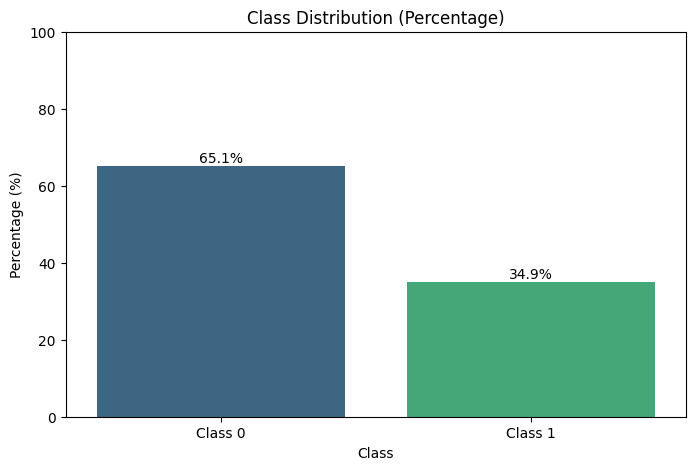

In [100]:
class_counts = df['Outcome'].value_counts()

# Calculate percentages
class_percentages = (class_counts / class_counts.sum()) * 100

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=class_percentages.index, y=class_percentages.values, palette='viridis')
plt.title('Class Distribution (Percentage)')
plt.xlabel('Class')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=class_percentages.index, labels=['Class 0', 'Class 1'], rotation=0)

# Adding percentage labels on the bars
for i, percentage in enumerate(class_percentages):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center')

plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.show()

**missing values:**


*   Glucose                       
*   skinThickness
*   insulin
*    BMI
*  BloodPressure

*since pregnency of an individual can be 0 we do not count zeros as missing values*



In [101]:
# Count the number of missing values in each column
missing_values = (df[:]==0).sum()

# Print the number of missing values for each column
print("Number of missing values for each column:")
print(missing_values)

Number of missing values for each column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


# Imputing with median

In [102]:
# Replace zeros with NaN for imputation, only in selected columns
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_impute] = df[columns_to_impute].replace(0, pd.NA)

# Apply median imputation to the selected columns
for column in columns_to_impute:
    df[column].fillna(df[column].median(), inplace=True)

# Verify if missing values are handled in the imputed columns
print("Missing values after median imputation:")
print(df[columns_to_impute].isna().sum())


Missing values after median imputation:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


<ipython-input-102-a55f9bf86084>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-102-a55f9bf86084>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-102-a55f9bf86084>:7: Future

In [103]:
# Count the number of missing values in each column
missing_values = (df[:]==0).sum()

# Print the number of missing values for each column
print("Number of missing values for each column:")
print(missing_values)

Number of missing values for each column:
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


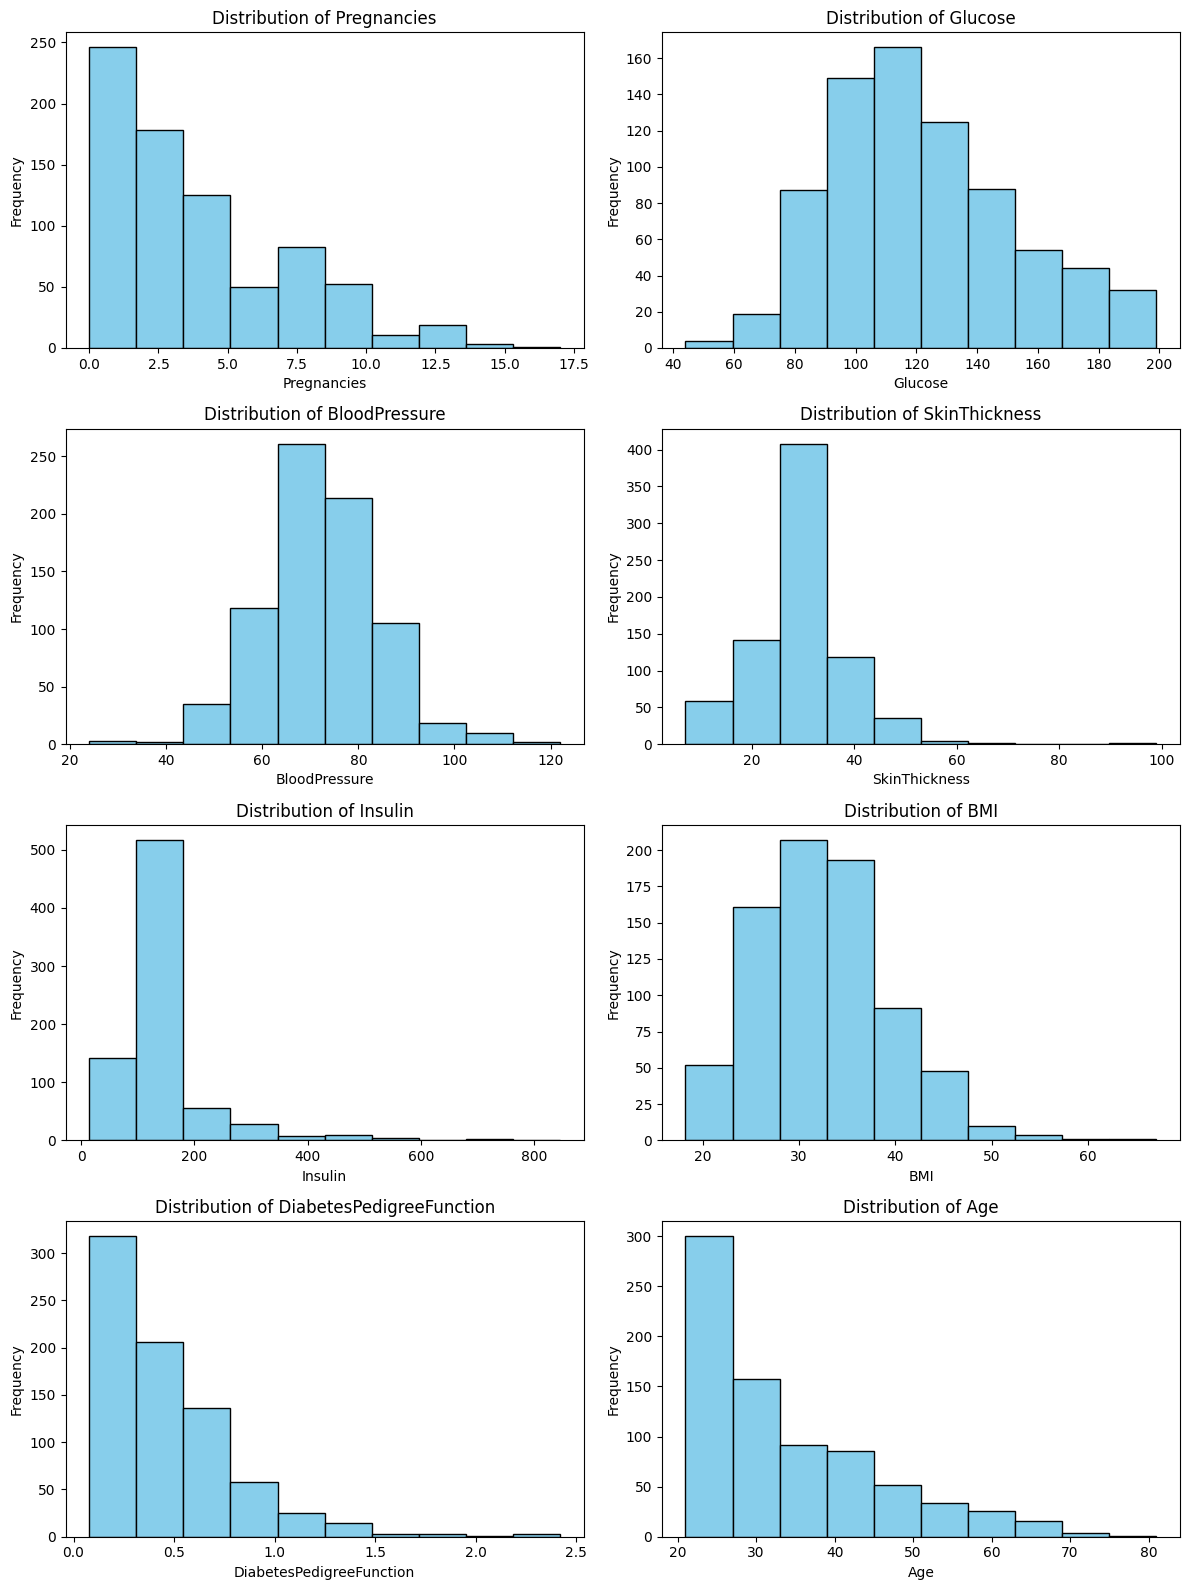

In [104]:
predictor_columns = df.columns[:-1]

# Set up the number of subplots
n_cols = 2  # Number of columns for subplots
n_rows = (len(predictor_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

plt.figure(figsize=(12, n_rows * 4))  # Set the figure size

# Iterate through each predictor column and create a histogram
for i, column in enumerate(predictor_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot
    plt.hist(df[column].dropna(), bins=10, color='skyblue', edgecolor='black')  # Plot histogram
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [105]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = df.drop(columns=['Outcome'])  # Features (predictors)
y = df['Outcome']  # Target variable

# Ensure correct types (optional, if needed)
X = X.astype(float)  # Convert features to float (if needed)
y = y.astype(int)    # Convert target to integer (if needed)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the split data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (614, 8)
Shape of X_test: (154, 8)
Shape of y_train: (614,)
Shape of y_test: (154,)


# A


1. **Decision Tree Model Fitting (Gini and Entropy)**
  * Objective: Fit a Decision Tree (DT) model with both Gini impurity and Entropy criteria to assess performance under each criterion.
  * Method:
  Trained two models, one with Gini and the other with Entropy, using a standard Decision Tree classifier.
  Averaged results over 100 runs for each model to reduce the impact of randomness and produce stable metrics.
  * Insight: Using both criteria allowed a comparative analysis to determine the most effective impurity criterion for the dataset. Averaging across multiple runs provided a reliable assessment of model performance, smoothing out variations due to random initialization.
2. **Addressing Class Imbalance with Class Weights**
  * Objective: Mitigate the impact of class imbalance to improve performance on the minority class.
  * Method: Adjusted class weights to give more importance to the minority class (class 1) for both Gini and Entropy models.
  * Observation: Incorporating class weights led to slight performance degradation, contrary to the expected improvement. This suggests that the model may not benefit from class weighting in this scenario, possibly due to the inherent characteristics of the dataset.
  * Decision: Based on the observed results, proceeded without class weights, opting to prioritize overall model stability.

## Summary

  Both Gini and Entropy criteria were assessed with stabilized metrics, confirming that neither criterion significantly outperformed the other.
  Class weighting, though attempted, did not yield improvement and was omitted from the final model configuration.



# Fitting with entropy vs gini

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [107]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29, stratify=y)

n runs

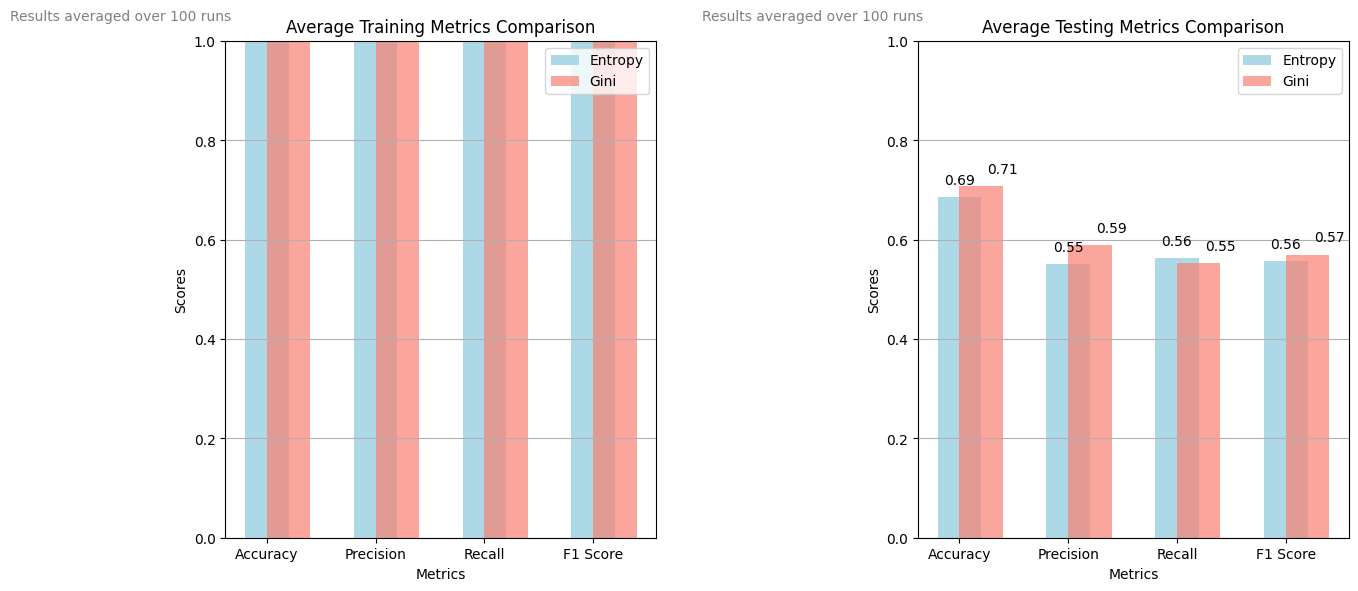

In [108]:
# @title
import numpy as np
# Number of runs
n_runs = 100

# Lists to store metrics for each run
train_entropy_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
test_entropy_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
train_gini_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
test_gini_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Function to train and evaluate Decision Tree
def evaluate_decision_tree(criterion):
    classifier = DecisionTreeClassifier(
        criterion=criterion, splitter="best",
    )

    classifier.fit(X_train, y_train)

    # Predictions on training and test sets
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)

    # Calculate metrics
    metrics_results = {
        'Accuracy': (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)),
        'Precision': (precision_score(y_train, y_train_pred), precision_score(y_test, y_test_pred)),
        'Recall': (recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred)),
        'F1 Score': (f1_score(y_train, y_train_pred), f1_score(y_test, y_test_pred)),
    }

    return metrics_results

# Run n times and store metrics
for _ in range(n_runs):
    # Evaluate entropy model
    entropy_results = evaluate_decision_tree('entropy')
    for metric in entropy_results:
        train_entropy_metrics[metric].append(entropy_results[metric][0])
        test_entropy_metrics[metric].append(entropy_results[metric][1])

    # Evaluate gini model
    gini_results = evaluate_decision_tree('gini')
    for metric in gini_results:
        train_gini_metrics[metric].append(gini_results[metric][0])
        test_gini_metrics[metric].append(gini_results[metric][1])

# Calculate average metrics for each criterion
avg_train_entropy_scores = [np.mean(train_entropy_metrics[metric]) for metric in train_entropy_metrics]
avg_test_entropy_scores = [np.mean(test_entropy_metrics[metric]) for metric in test_entropy_metrics]
avg_train_gini_scores = [np.mean(train_gini_metrics[metric]) for metric in train_gini_metrics]
avg_test_gini_scores = [np.mean(test_gini_metrics[metric]) for metric in test_gini_metrics]

# Set up subplots
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for training metrics
axes[0].bar(metrics, avg_train_entropy_scores, width=0.4, label='Entropy', color='lightblue', align='center')
axes[0].bar(metrics, avg_train_gini_scores, width=0.4, label='Gini', color='salmon', alpha=0.7, align='edge')

axes[0].set_ylim(0, 1)  # Assuming metrics are in the range [0, 1]
axes[0].set_title('Average Training Metrics Comparison')
axes[0].set_ylabel('Scores')
axes[0].set_xlabel('Metrics')
axes[0].legend()
axes[0].grid(axis='y')


# Plot for testing metrics
axes[1].bar(metrics, avg_test_entropy_scores, width=0.4, label='Entropy', color='lightblue', align='center')
axes[1].bar(metrics, avg_test_gini_scores, width=0.4, label='Gini', color='salmon', alpha=0.7, align='edge')

axes[1].set_ylim(0, 1)  # Assuming metrics are in the range [0, 1]
axes[1].set_title('Average Testing Metrics Comparison')
axes[1].set_ylabel('Scores')
axes[1].set_xlabel('Metrics')
axes[1].legend()
axes[1].grid(axis='y')

# Annotate the testing scores on the bars
for i in range(len(metrics)):
    axes[1].text(i, avg_test_entropy_scores[i] + 0.02, f'{avg_test_entropy_scores[i]:.2f}', ha='center', va='bottom')
    axes[1].text(i + 0.4, avg_test_gini_scores[i] + 0.02, f'{avg_test_gini_scores[i]:.2f}', ha='center', va='bottom')

# Add a text annotation to each plot to indicate the number of runs
axes[0].text(-0.5, 1.05, f"Results averaged over {n_runs} runs",
             ha='left', va='center', fontsize=10, color='gray', transform=axes[0].transAxes)

axes[1].text(-0.5, 1.05, f"Results averaged over {n_runs} runs",
             ha='left', va='center', fontsize=10, color='gray', transform=axes[1].transAxes)


plt.tight_layout()
plt.show()


# Fitting with class_weight to address imbalanced data

entropy

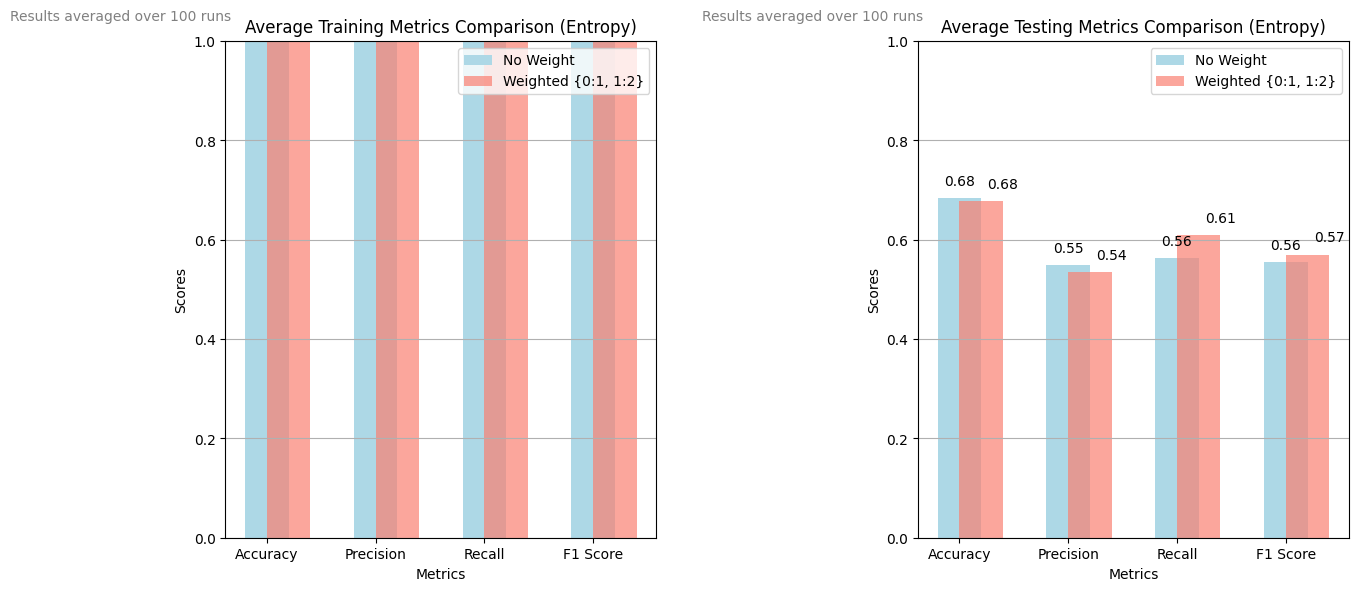

In [109]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Number of runs
n_runs = 100

# Lists to store metrics for each run
train_no_weight_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
test_no_weight_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
train_weighted_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
test_weighted_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Function to train and evaluate Decision Tree with specified class weight
def evaluate_decision_tree(class_weight=None):
    classifier = DecisionTreeClassifier(
        criterion="entropy", splitter="best",
        max_depth=None, min_samples_split=2,
        min_samples_leaf=1, max_features=None,
        class_weight=class_weight
    )

    classifier.fit(X_train, y_train)

    # Predictions on training and test sets
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)

    # Calculate metrics
    metrics_results = {
        'Accuracy': (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)),
        'Precision': (precision_score(y_train, y_train_pred), precision_score(y_test, y_test_pred)),
        'Recall': (recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred)),
        'F1 Score': (f1_score(y_train, y_train_pred), f1_score(y_test, y_test_pred)),
    }

    return metrics_results

# Run n times and store metrics
for _ in range(n_runs):
    # Evaluate model with no weight
    no_weight_results = evaluate_decision_tree(class_weight=None)
    for metric in no_weight_results:
        train_no_weight_metrics[metric].append(no_weight_results[metric][0])
        test_no_weight_metrics[metric].append(no_weight_results[metric][1])

    # Evaluate model with weighted setting
    weighted_results = evaluate_decision_tree(class_weight={0: 1, 1: 2})
    for metric in weighted_results:
        train_weighted_metrics[metric].append(weighted_results[metric][0])
        test_weighted_metrics[metric].append(weighted_results[metric][1])

# Calculate average metrics for each setting
avg_train_no_weight_scores = [np.mean(train_no_weight_metrics[metric]) for metric in train_no_weight_metrics]
avg_test_no_weight_scores = [np.mean(test_no_weight_metrics[metric]) for metric in test_no_weight_metrics]
avg_train_weighted_scores = [np.mean(train_weighted_metrics[metric]) for metric in train_weighted_metrics]
avg_test_weighted_scores = [np.mean(test_weighted_metrics[metric]) for metric in test_weighted_metrics]

# Set up subplots
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for training metrics
axes[0].bar(metrics, avg_train_no_weight_scores, width=0.4, label='No Weight', color='lightblue', align='center')
axes[0].bar(metrics, avg_train_weighted_scores, width=0.4, label='Weighted {0:1, 1:2}', color='salmon', alpha=0.7, align='edge')

axes[0].set_ylim(0, 1)  # Assuming metrics are in the range [0, 1]
axes[0].set_title('Average Training Metrics Comparison (Entropy)')
axes[0].set_ylabel('Scores')
axes[0].set_xlabel('Metrics')
axes[0].legend()
axes[0].grid(axis='y')

# Plot for testing metrics
axes[1].bar(metrics, avg_test_no_weight_scores, width=0.4, label='No Weight', color='lightblue', align='center')
axes[1].bar(metrics, avg_test_weighted_scores, width=0.4, label='Weighted {0:1, 1:2}', color='salmon', alpha=0.7, align='edge')

axes[1].set_ylim(0, 1)  # Assuming metrics are in the range [0, 1]
axes[1].set_title('Average Testing Metrics Comparison (Entropy)')
axes[1].set_ylabel('Scores')
axes[1].set_xlabel('Metrics')
axes[1].legend()
axes[1].grid(axis='y')

# Annotate the testing scores on the bars
for i in range(len(metrics)):
    axes[1].text(i, avg_test_no_weight_scores[i] + 0.02, f'{avg_test_no_weight_scores[i]:.2f}', ha='center', va='bottom')
    axes[1].text(i + 0.4, avg_test_weighted_scores[i] + 0.02, f'{avg_test_weighted_scores[i]:.2f}', ha='center', va='bottom')

# Add a text annotation to each plot to indicate the number of runs
axes[0].text(-0.5, 1.05, f"Results averaged over {n_runs} runs",
             ha='left', va='center', fontsize=10, color='gray', transform=axes[0].transAxes)

axes[1].text(-0.5, 1.05, f"Results averaged over {n_runs} runs",
             ha='left', va='center', fontsize=10, color='gray', transform=axes[1].transAxes)

plt.tight_layout()
plt.show()


gini

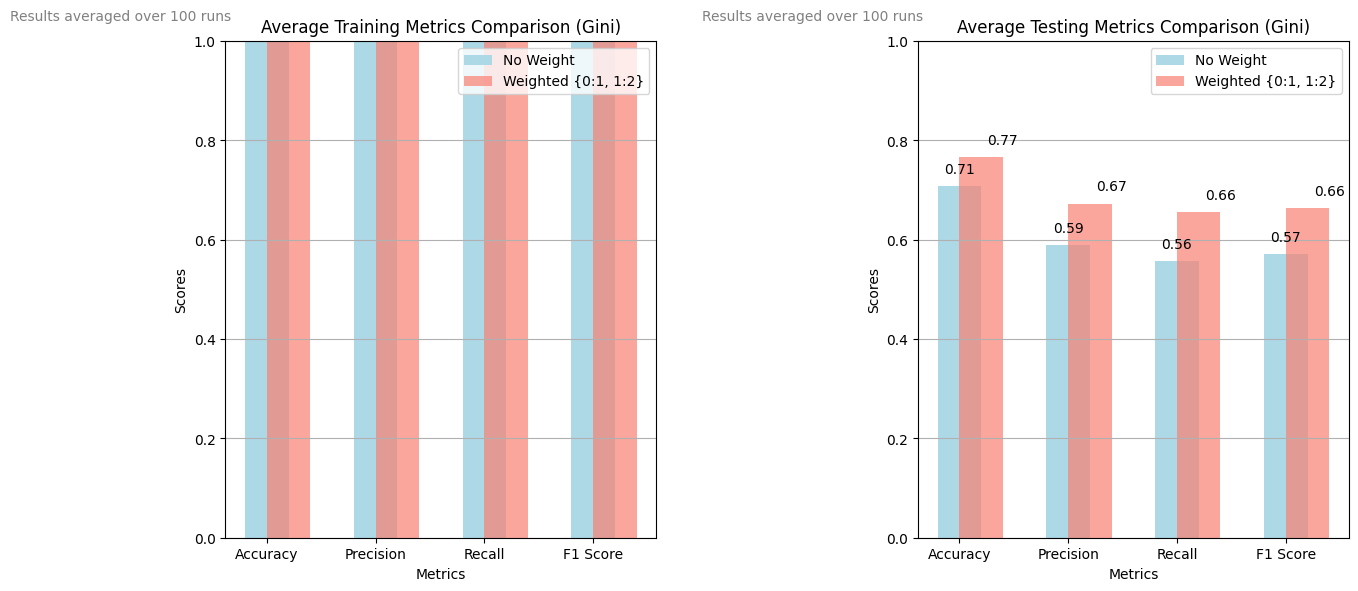

In [110]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Number of runs
n_runs = 100

# Lists to store metrics for each run
train_no_weight_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
test_no_weight_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
train_weighted_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
test_weighted_metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# Function to train and evaluate Decision Tree with specified class weight
def evaluate_decision_tree(class_weight=None):
    classifier = DecisionTreeClassifier(
        criterion="gini", splitter="best",
        max_depth=None, min_samples_split=2,
        min_samples_leaf=1, max_features=None,
        class_weight=class_weight
    )

    classifier.fit(X_train, y_train)

    # Predictions on training and test sets
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)

    # Calculate metrics
    metrics_results = {
        'Accuracy': (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)),
        'Precision': (precision_score(y_train, y_train_pred), precision_score(y_test, y_test_pred)),
        'Recall': (recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred)),
        'F1 Score': (f1_score(y_train, y_train_pred), f1_score(y_test, y_test_pred)),
    }

    return metrics_results

# Run n times and store metrics
for _ in range(n_runs):
    # Evaluate model with no weight
    no_weight_results = evaluate_decision_tree(class_weight=None)
    for metric in no_weight_results:
        train_no_weight_metrics[metric].append(no_weight_results[metric][0])
        test_no_weight_metrics[metric].append(no_weight_results[metric][1])

    # Evaluate model with weighted setting
    weighted_results = evaluate_decision_tree(class_weight={0: 1, 1: 2})
    for metric in weighted_results:
        train_weighted_metrics[metric].append(weighted_results[metric][0])
        test_weighted_metrics[metric].append(weighted_results[metric][1])

# Calculate average metrics for each setting
avg_train_no_weight_scores = [np.mean(train_no_weight_metrics[metric]) for metric in train_no_weight_metrics]
avg_test_no_weight_scores = [np.mean(test_no_weight_metrics[metric]) for metric in test_no_weight_metrics]
avg_train_weighted_scores = [np.mean(train_weighted_metrics[metric]) for metric in train_weighted_metrics]
avg_test_weighted_scores = [np.mean(test_weighted_metrics[metric]) for metric in test_weighted_metrics]

# Set up subplots
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for training metrics
axes[0].bar(metrics, avg_train_no_weight_scores, width=0.4, label='No Weight', color='lightblue', align='center')
axes[0].bar(metrics, avg_train_weighted_scores, width=0.4, label='Weighted {0:1, 1:2}', color='salmon', alpha=0.7, align='edge')

axes[0].set_ylim(0, 1)  # Assuming metrics are in the range [0, 1]
axes[0].set_title('Average Training Metrics Comparison (Gini)')
axes[0].set_ylabel('Scores')
axes[0].set_xlabel('Metrics')
axes[0].legend()
axes[0].grid(axis='y')

# Plot for testing metrics
axes[1].bar(metrics, avg_test_no_weight_scores, width=0.4, label='No Weight', color='lightblue', align='center')
axes[1].bar(metrics, avg_test_weighted_scores, width=0.4, label='Weighted {0:1, 1:2}', color='salmon', alpha=0.7, align='edge')

axes[1].set_ylim(0, 1)  # Assuming metrics are in the range [0, 1]
axes[1].set_title('Average Testing Metrics Comparison (Gini)')
axes[1].set_ylabel('Scores')
axes[1].set_xlabel('Metrics')
axes[1].legend()
axes[1].grid(axis='y')

# Annotate the testing scores on the bars
for i in range(len(metrics)):
    axes[1].text(i, avg_test_no_weight_scores[i] + 0.02, f'{avg_test_no_weight_scores[i]:.2f}', ha='center', va='bottom')
    axes[1].text(i + 0.4, avg_test_weighted_scores[i] + 0.02, f'{avg_test_weighted_scores[i]:.2f}', ha='center', va='bottom')

# Add a text annotation to each plot to indicate the number of runs
axes[0].text(-0.5, 1.05, f"Results averaged over {n_runs} runs",
             ha='left', va='center', fontsize=10, color='gray', transform=axes[0].transAxes)

axes[1].text(-0.5, 1.05, f"Results averaged over {n_runs} runs",
             ha='left', va='center', fontsize=10, color='gray', transform=axes[1].transAxes)

plt.tight_layout()
plt.show()


# B

## Investigating on what should be the hyperparameters of the model


Based on the notebook content, here’s an extended report covering dataset splitting, hyperparameter tuning, and tree pruning steps, including your use of F1 score analysis for model selection.

Report: Model Splitting, Hyperparameter Tuning, and Pruning
1. **Train, Test, and Evaluation Split**
  * Objective: Split the dataset into distinct subsets for training, evaluation, and testing to ensure robust model performance assessment.
  * Method:
  * Divided the dataset into 70% for training, 15% for evaluation, and 15% for testing.
  Ensures a balanced approach where the model has adequate data for learning while preserving separate subsets for validation and final performance evaluation.
  * Insight: This split enables reliable model selection and testing, reducing risks of overfitting and providing unbiased performance metrics.
2. **Hyperparameter Tuning**
  * Objective: Identify optimal values for max_depth and min_samples_split parameters in the Decision Tree model.
  * Method:
  * Conducted separate hyperparameter searches for max_depth and min_samples_split.
  Recorded and analyzed F1 scores on the evaluation set for different values of each parameter to find the best-performing combinations.
Evaluated both Gini and Entropy criteria to determine their impact on model performance.
  * Insight: Optimal hyperparameters significantly improved model performance, as evidenced by better F1 scores on evaluation and test sets. The choice of both max_depth and min_samples_split directly influences the model’s complexity and generalizability.
3. **Decision Tree Pruning**
  * Objective: Reduce model complexity by pruning the Decision Tree using the ccp_alpha parameter.
  * Method:
Applied post-pruning with cost-complexity pruning path (ccp_alpha) to simplify the tree while maintaining high accuracy.
Conducted a search over different ccp_alpha values and recorded average F1 scores over multiple runs to ensure stability and reduce randomness.
  * Results:
Pruning further enhanced model performance by preventing overfitting and focusing on the most important splits.
Plots of F1 score versus ccp_alpha illustrated the trade-off between tree size and accuracy, with a distinct peak indicating optimal pruning level.
Insight: Pruning is a key step in managing the complexity of tree-based models, reducing overfitting risks, and improving generalization on unseen data.

investigated depth of the fitted trees

In [111]:
n = 100
depth_sum = 0
for _ in range(n):
  classifier = DecisionTreeClassifier(
      criterion="entropy", splitter="best",
      max_depth=None, min_samples_split=2,
      min_samples_leaf=1, max_features=None,
      class_weight=None
  )

  classifier.fit(X_train, y_train)
  depth_sum += classifier.tree_.max_depth

print("average depth of the fitted Decision Tree:", depth_sum/n)


average depth of the fitted Decision Tree: 19.29


In [112]:
# 70, 15, 15
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes to verify
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("Evaluation set size:", X_eval.shape[0])


Training set size: 537
Testing set size: 115
Evaluation set size: 116


## In below tests I figured out the better split is done based on **entropy**

# max_depth as hyperparameter

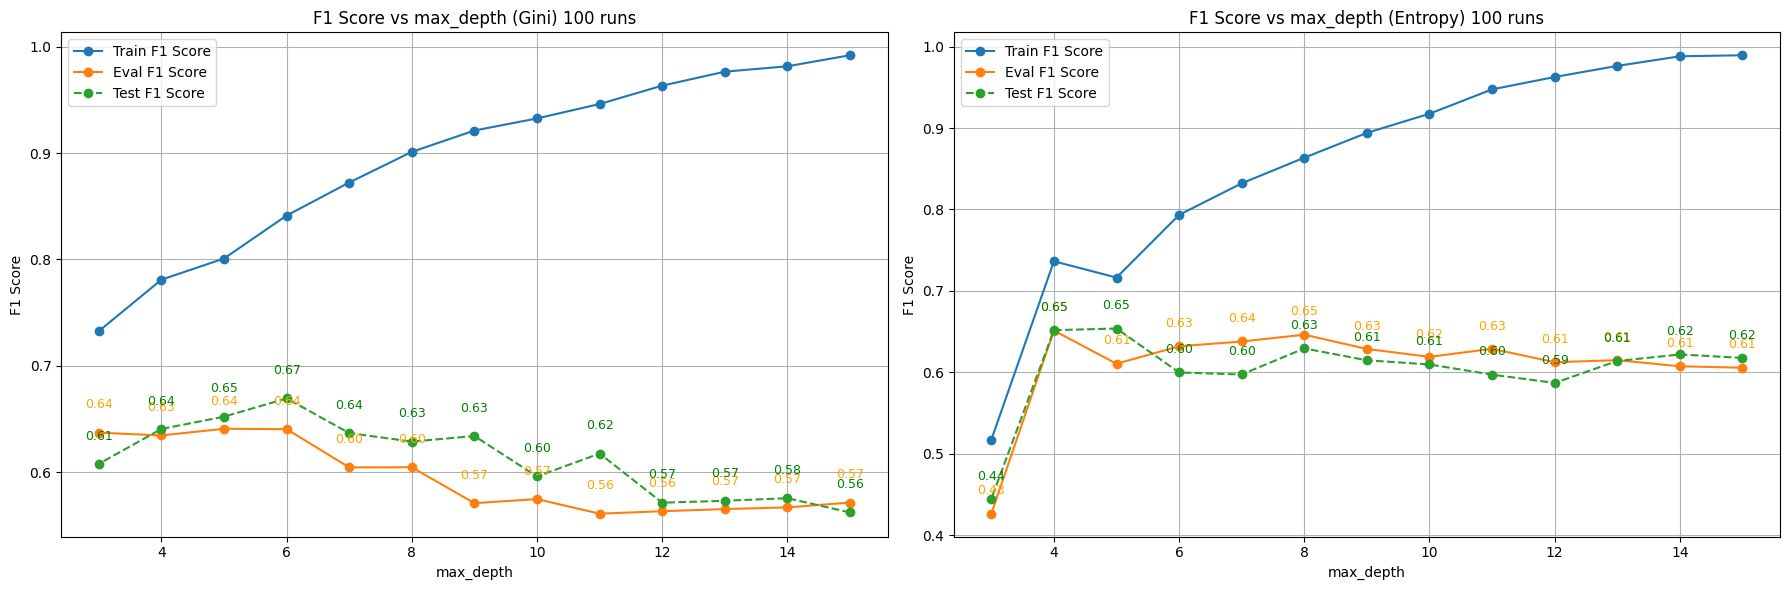

Best model results for Gini criterion:
Best max_depth (Gini): 5
Best model Train F1 Score (Gini): 0.80
Best model Eval F1 Score (Gini): 0.64
Best model Test F1 Score (Gini): 0.65

Best model results for Entropy criterion:
Best max_depth (Entropy): 4
Best model Train F1 Score (Entropy): 0.74
Best model Eval F1 Score (Entropy): 0.65
Best model Test F1 Score (Entropy): 0.65


In [124]:
# @title
# Parameters
max_depth_values = range(15, 2, -1)  # From 15 down to 2
n_runs = 100  # Number of runs for averaging

# Track best F1 scores and model scores for gini
best_f1_score_gini = 0
best_model_train_f1_gini = 0
best_model_eval_f1_gini = 0
best_model_test_f1_gini = 0

# Track best F1 scores and model scores for entropy
best_f1_score_entropy = 0
best_model_train_f1_entropy = 0
best_model_eval_f1_entropy = 0
best_model_test_f1_entropy = 0

# Lists to store average results for plotting
train_f1_scores_gini = []
eval_f1_scores_gini = []
test_f1_scores_gini = []

train_f1_scores_entropy = []
eval_f1_scores_entropy = []
test_f1_scores_entropy = []

# Hyperparameter search for max_depth with gini criterion
for max_depth in max_depth_values:
    temp_train_f1_gini = []
    temp_eval_f1_gini = []
    temp_test_f1_gini = []

    temp_train_f1_entropy = []
    temp_eval_f1_entropy = []
    temp_test_f1_entropy = []

    for _ in range(n_runs):
        # Gini model
        classifier_gini = DecisionTreeClassifier(
            criterion="gini", splitter="best",
            max_depth=max_depth, min_samples_split=2,
            min_samples_leaf=1, max_features=None,
            class_weight={0: 1, 1: 2}
            )
        classifier_gini.fit(X_train, y_train)

        # Entropy model
        classifier_entropy = DecisionTreeClassifier(
            criterion="entropy", splitter="best",
            max_depth=max_depth, min_samples_split=2,
            min_samples_leaf=1, max_features=None,
            class_weight=None
        )
        classifier_entropy.fit(X_train, y_train)

        # Training, eval, and test predictions for gini
        y_train_pred_gini = classifier_gini.predict(X_train)
        y_eval_pred_gini = classifier_gini.predict(X_eval)
        y_test_pred_gini = classifier_gini.predict(X_test)

        # F1 scores for gini
        temp_train_f1_gini.append(f1_score(y_train, y_train_pred_gini))
        temp_eval_f1_gini.append(f1_score(y_eval, y_eval_pred_gini))
        temp_test_f1_gini.append(f1_score(y_test, y_test_pred_gini))

        # Training, eval, and test predictions for entropy
        y_train_pred_entropy = classifier_entropy.predict(X_train)
        y_eval_pred_entropy = classifier_entropy.predict(X_eval)
        y_test_pred_entropy = classifier_entropy.predict(X_test)

        # F1 scores for entropy
        temp_train_f1_entropy.append(f1_score(y_train, y_train_pred_entropy))
        temp_eval_f1_entropy.append(f1_score(y_eval, y_eval_pred_entropy))
        temp_test_f1_entropy.append(f1_score(y_test, y_test_pred_entropy))

    # Average results across runs for gini
    avg_train_f1_gini = np.mean(temp_train_f1_gini)
    avg_eval_f1_gini = np.mean(temp_eval_f1_gini)
    avg_test_f1_gini = np.mean(temp_test_f1_gini)
    train_f1_scores_gini.append(avg_train_f1_gini)
    eval_f1_scores_gini.append(avg_eval_f1_gini)
    test_f1_scores_gini.append(avg_test_f1_gini)

    # Track the best gini model based on eval F1 score
    if avg_eval_f1_gini > best_f1_score_gini:
        best_f1_score_gini = avg_eval_f1_gini
        best_model_train_f1_gini = avg_train_f1_gini
        best_model_eval_f1_gini = avg_eval_f1_gini
        best_model_test_f1_gini = avg_test_f1_gini

    # Average results across runs for entropy
    avg_train_f1_entropy = np.mean(temp_train_f1_entropy)
    avg_eval_f1_entropy = np.mean(temp_eval_f1_entropy)
    avg_test_f1_entropy = np.mean(temp_test_f1_entropy)
    train_f1_scores_entropy.append(avg_train_f1_entropy)
    eval_f1_scores_entropy.append(avg_eval_f1_entropy)
    test_f1_scores_entropy.append(avg_test_f1_entropy)

    # Track the best entropy model based on eval F1 score
    if avg_eval_f1_entropy > best_f1_score_entropy:
        best_f1_score_entropy = avg_eval_f1_entropy
        best_model_train_f1_entropy = avg_train_f1_entropy
        best_model_eval_f1_entropy = avg_eval_f1_entropy
        best_model_test_f1_entropy = avg_test_f1_entropy

# Plotting the results for gini and entropy
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for gini
axes[0].plot(max_depth_values, train_f1_scores_gini, label='Train F1 Score', marker='o')
axes[0].plot(max_depth_values, eval_f1_scores_gini, label='Eval F1 Score', marker='o')
axes[0].plot(max_depth_values, test_f1_scores_gini, label='Test F1 Score', marker='o', linestyle='--')
axes[0].set_xlabel('max_depth')
axes[0].set_ylabel('F1 Score')
axes[0].set_title(f'F1 Score vs max_depth (Gini) {n} runs')
axes[0].legend()
axes[0].grid(True)

# Annotate each test score on the plot for gini
for i, max_depth in enumerate(max_depth_values):
    axes[0].text(max_depth, eval_f1_scores_gini[i] + 0.02, f'{eval_f1_scores_gini[i]:.2f}', ha='center', va='bottom', fontsize=9, color="orange")
    axes[0].text(max_depth, test_f1_scores_gini[i] + 0.02, f'{test_f1_scores_gini[i]:.2f}', ha='center', va='bottom', fontsize=9, color="green")

# Plot for entropy
axes[1].plot(max_depth_values, train_f1_scores_entropy, label='Train F1 Score', marker='o')
axes[1].plot(max_depth_values, eval_f1_scores_entropy, label='Eval F1 Score', marker='o')
axes[1].plot(max_depth_values, test_f1_scores_entropy, label='Test F1 Score', marker='o', linestyle='--')
axes[1].set_xlabel('max_depth')
axes[1].set_ylabel('F1 Score')
axes[1].set_title(f'F1 Score vs max_depth (Entropy) {n} runs')
axes[1].legend()
axes[1].grid(True)

# Annotate each test score on the plot for entropy
for i, max_depth in enumerate(max_depth_values):
    axes[1].text(max_depth, eval_f1_scores_entropy[i] + 0.02, f'{eval_f1_scores_entropy[i]:.2f}', ha='center', va='bottom', fontsize=9, color="orange")
    axes[1].text(max_depth, test_f1_scores_entropy[i] + 0.02, f'{test_f1_scores_entropy[i]:.2f}', ha='center', va='bottom', fontsize=9, color="green")

plt.tight_layout()
plt.show()

# Report results for the best model based on saved scores
print("Best model results for Gini criterion:")
print(f"Best max_depth (Gini): {max_depth_values[eval_f1_scores_gini.index(best_f1_score_gini)]}")
print(f"Best model Train F1 Score (Gini): {best_model_train_f1_gini:.2f}")
print(f"Best model Eval F1 Score (Gini): {best_model_eval_f1_gini:.2f}")
print(f"Best model Test F1 Score (Gini): {best_model_test_f1_gini:.2f}")

print("\nBest model results for Entropy criterion:")
print(f"Best max_depth (Entropy): {max_depth_values[eval_f1_scores_entropy.index(best_f1_score_entropy)]}")
print(f"Best model Train F1 Score (Entropy): {best_model_train_f1_entropy:.2f}")
print(f"Best model Eval F1 Score (Entropy): {best_model_eval_f1_entropy:.2f}")
print(f"Best model Test F1 Score (Entropy): {best_model_test_f1_entropy:.2f}")


# min_samples_split as hyperparameter

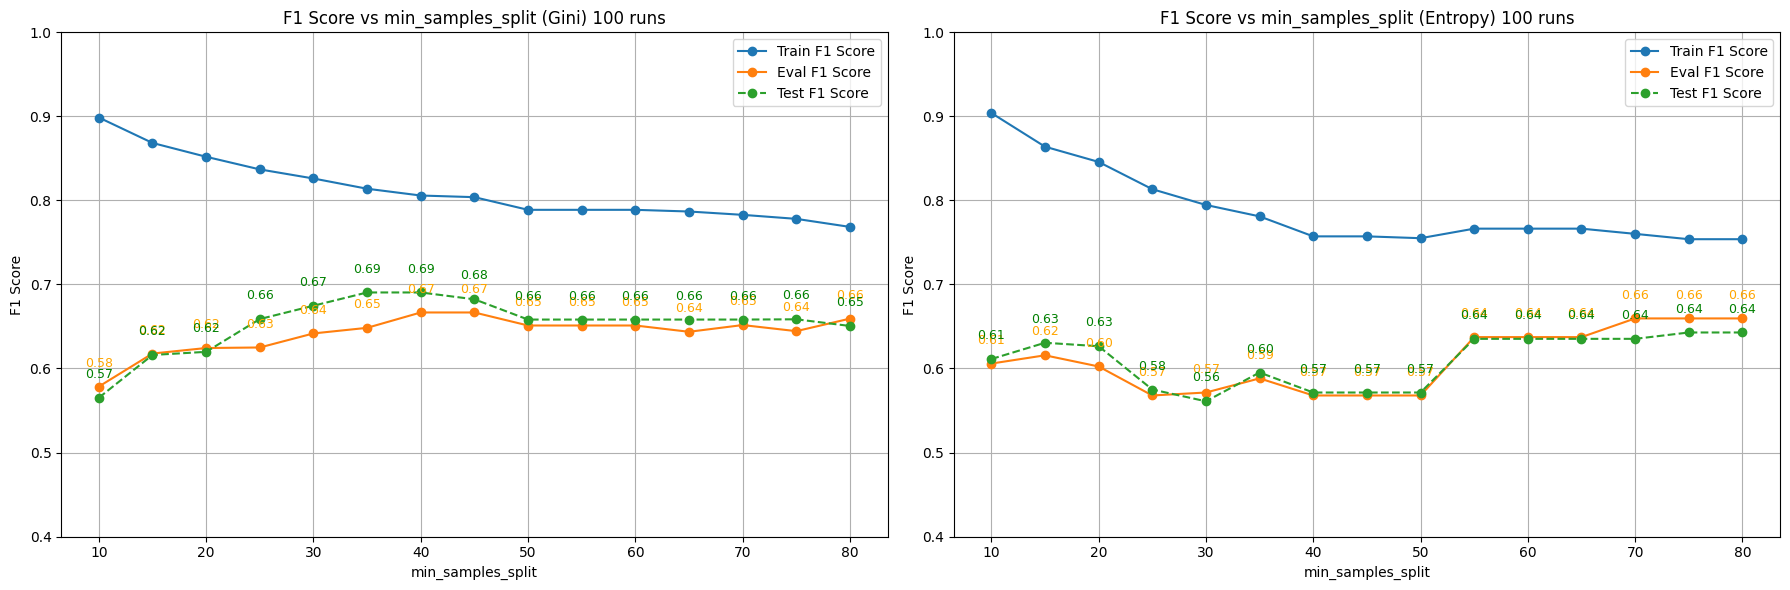

Best model results for Gini criterion:
Best min_samples_split (Gini): 40
Best model Train F1 Score (Gini): 0.81
Best model Eval F1 Score (Gini): 0.67
Best model Test F1 Score (Gini): 0.69

Best model results for Entropy criterion:
Best min_samples_split (Entropy): 70
Best model Train F1 Score (Entropy): 0.76
Best model Eval F1 Score (Entropy): 0.66
Best model Test F1 Score (Entropy): 0.64


In [123]:
# @title
# Parameters
min_samples_split_values = range(10, 81, 5)  # From 10 to 60 in steps of 5
n_runs = 100  # Number of runs for averaging

# Track best F1 scores and model scores for gini
best_f1_score_gini = 0
best_model_train_f1_gini = 0
best_model_eval_f1_gini = 0
best_model_test_f1_gini = 0

# Track best F1 scores and model scores for entropy
best_f1_score_entropy = 0
best_model_train_f1_entropy = 0
best_model_eval_f1_entropy = 0
best_model_test_f1_entropy = 0

# Lists to store average results for plotting
train_f1_scores_gini = []
eval_f1_scores_gini = []
test_f1_scores_gini = []

train_f1_scores_entropy = []
eval_f1_scores_entropy = []
test_f1_scores_entropy = []

# Hyperparameter search for min_samples_split with gini and entropy criteria
for min_samples_split in min_samples_split_values:
    temp_train_f1_gini = []
    temp_eval_f1_gini = []
    temp_test_f1_gini = []

    temp_train_f1_entropy = []
    temp_eval_f1_entropy = []
    temp_test_f1_entropy = []

    for _ in range(n_runs):
        # Gini model
        classifier_gini = DecisionTreeClassifier(
            criterion="gini", splitter="best",
            max_depth=None, min_samples_split=min_samples_split,
            min_samples_leaf=1, max_features=None,
            class_weight={0: 1, 1: 2}
        )
        classifier_gini.fit(X_train, y_train)

        # Entropy model
        classifier_entropy = DecisionTreeClassifier(
            criterion="entropy", splitter="best",
            max_depth=None, min_samples_split=min_samples_split,
            min_samples_leaf=1, max_features=None,
            class_weight=None
        )
        classifier_entropy.fit(X_train, y_train)

        # Training, eval, and test predictions for gini
        y_train_pred_gini = classifier_gini.predict(X_train)
        y_eval_pred_gini = classifier_gini.predict(X_eval)
        y_test_pred_gini = classifier_gini.predict(X_test)

        # F1 scores for gini
        temp_train_f1_gini.append(f1_score(y_train, y_train_pred_gini))
        temp_eval_f1_gini.append(f1_score(y_eval, y_eval_pred_gini))
        temp_test_f1_gini.append(f1_score(y_test, y_test_pred_gini))

        # Training, eval, and test predictions for entropy
        y_train_pred_entropy = classifier_entropy.predict(X_train)
        y_eval_pred_entropy = classifier_entropy.predict(X_eval)
        y_test_pred_entropy = classifier_entropy.predict(X_test)

        # F1 scores for entropy
        temp_train_f1_entropy.append(f1_score(y_train, y_train_pred_entropy))
        temp_eval_f1_entropy.append(f1_score(y_eval, y_eval_pred_entropy))
        temp_test_f1_entropy.append(f1_score(y_test, y_test_pred_entropy))

    # Average results across runs for gini
    avg_train_f1_gini = np.mean(temp_train_f1_gini)
    avg_eval_f1_gini = np.mean(temp_eval_f1_gini)
    avg_test_f1_gini = np.mean(temp_test_f1_gini)
    train_f1_scores_gini.append(avg_train_f1_gini)
    eval_f1_scores_gini.append(avg_eval_f1_gini)
    test_f1_scores_gini.append(avg_test_f1_gini)

    # Track the best gini model based on eval F1 score
    if avg_eval_f1_gini > best_f1_score_gini:
        best_f1_score_gini = avg_eval_f1_gini
        best_model_train_f1_gini = avg_train_f1_gini
        best_model_eval_f1_gini = avg_eval_f1_gini
        best_model_test_f1_gini = avg_test_f1_gini

    # Average results across runs for entropy
    avg_train_f1_entropy = np.mean(temp_train_f1_entropy)
    avg_eval_f1_entropy = np.mean(temp_eval_f1_entropy)
    avg_test_f1_entropy = np.mean(temp_test_f1_entropy)
    train_f1_scores_entropy.append(avg_train_f1_entropy)
    eval_f1_scores_entropy.append(avg_eval_f1_entropy)
    test_f1_scores_entropy.append(avg_test_f1_entropy)

    # Track the best entropy model based on eval F1 score
    if avg_eval_f1_entropy > best_f1_score_entropy:
        best_f1_score_entropy = avg_eval_f1_entropy
        best_model_train_f1_entropy = avg_train_f1_entropy
        best_model_eval_f1_entropy = avg_eval_f1_entropy
        best_model_test_f1_entropy = avg_test_f1_entropy

# Plotting the results for gini and entropy
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for gini
axes[0].plot(min_samples_split_values, train_f1_scores_gini, label='Train F1 Score', marker='o')
axes[0].plot(min_samples_split_values, eval_f1_scores_gini, label='Eval F1 Score', marker='o')
axes[0].plot(min_samples_split_values, test_f1_scores_gini, label='Test F1 Score', marker='o', linestyle='--')
axes[0].set_xlabel('min_samples_split')
axes[0].set_ylabel('F1 Score')
axes[0].set_title(f'F1 Score vs min_samples_split (Gini) {n_runs} runs')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylim(0.4, 1)

# Annotate each test score on the plot for gini
for i, min_samples_split in enumerate(min_samples_split_values):
    axes[0].text(min_samples_split, eval_f1_scores_gini[i] + 0.02, f'{eval_f1_scores_gini[i]:.2f}', ha='center', va='bottom', fontsize=9, color="orange")
    axes[0].text(min_samples_split, test_f1_scores_gini[i] + 0.02, f'{test_f1_scores_gini[i]:.2f}', ha='center', va='bottom', fontsize=9, color="green")

# Plot for entropy
axes[1].plot(min_samples_split_values, train_f1_scores_entropy, label='Train F1 Score', marker='o')
axes[1].plot(min_samples_split_values, eval_f1_scores_entropy, label='Eval F1 Score', marker='o')
axes[1].plot(min_samples_split_values, test_f1_scores_entropy, label='Test F1 Score', marker='o', linestyle='--')
axes[1].set_xlabel('min_samples_split')
axes[1].set_ylabel('F1 Score')
axes[1].set_title(f'F1 Score vs min_samples_split (Entropy) {n_runs} runs')
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylim(0.4, 1)

# Annotate each test score on the plot for entropy
for i, min_samples_split in enumerate(min_samples_split_values):
    axes[1].text(min_samples_split, eval_f1_scores_entropy[i] + 0.02, f'{eval_f1_scores_entropy[i]:.2f}', ha='center', va='bottom', fontsize=9, color="orange")
    axes[1].text(min_samples_split, test_f1_scores_entropy[i] + 0.02, f'{test_f1_scores_entropy[i]:.2f}', ha='center', va='bottom', fontsize=9, color="green")

plt.tight_layout()
plt.show()

# Report results for the best model based on saved scores
print("Best model results for Gini criterion:")
print(f"Best min_samples_split (Gini): {min_samples_split_values[eval_f1_scores_gini.index(best_f1_score_gini)]}")
print(f"Best model Train F1 Score (Gini): {best_model_train_f1_gini:.2f}")
print(f"Best model Eval F1 Score (Gini): {best_model_eval_f1_gini:.2f}")
print(f"Best model Test F1 Score (Gini): {best_model_test_f1_gini:.2f}")

print("\nBest model results for Entropy criterion:")
print(f"Best min_samples_split (Entropy): {min_samples_split_values[eval_f1_scores_entropy.index(best_f1_score_entropy)]}")
print(f"Best model Train F1 Score (Entropy): {best_model_train_f1_entropy:.2f}")
print(f"Best model Eval F1 Score (Entropy): {best_model_eval_f1_entropy:.2f}")
print(f"Best model Test F1 Score (Entropy): {best_model_test_f1_entropy:.2f}")


# Optimal hyperparameters

In [129]:
# Fit the classifier
classifier = DecisionTreeClassifier(
    criterion="entropy", splitter="best",
    max_depth=4,
    min_samples_leaf=1,
    # class_weight={0: 1, 1: 2}
)
classifier.fit(X_train, y_train)

# Predict on the train and test sets
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate F1 scores for train and test sets
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Calculate additional metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)

# Print the results
print(f"Train F1 Score: {train_f1:.3f}")
print(f"Test F1 Score: {test_f1:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Test Recall: {test_recall:.3f}")
print(f"Test Precision: {test_precision:.3f}")

Train F1 Score: 0.736
Test F1 Score: 0.652
Test Accuracy: 0.730
Test Recall: 0.784
Test Precision: 0.558


In [127]:
# Fit the classifier
classifier = DecisionTreeClassifier(
    criterion="gini",
    splitter="best",
    min_samples_split=40,
    min_samples_leaf=1, max_features=None
    ,class_weight={0: 1, 1: 2}
)
classifier.fit(X_train, y_train)

# Predict on the train and test sets
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate F1 scores for train and test sets
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Calculate additional metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)

# Print the results
print(f"Train F1 Score: {train_f1:.3f}")
print(f"Test F1 Score: {test_f1:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Test Recall: {test_recall:.3f}")
print(f"Test Precision: {test_precision:.3f}")

Train F1 Score: 0.806
Test F1 Score: 0.690
Test Accuracy: 0.774
Test Recall: 0.784
Test Precision: 0.617


## both optimal hyperparameters set

In [117]:
# Fit the classifier
classifier = DecisionTreeClassifier(
    criterion="entropy", splitter="best",
    max_depth=5,
    min_samples_split=75,
    min_samples_leaf=1, max_features=None
)
classifier.fit(X_train, y_train)

# Predict on the train and test sets
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate F1 scores for train and test sets
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Calculate additional metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)

# Print the results
print(f"Train F1 Score: {train_f1:.3f}")
print(f"Test F1 Score: {test_f1:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print(f"Test Recall: {test_recall:.3f}")
print(f"Test Precision: {test_precision:.3f}")

Train F1 Score: 0.660
Test F1 Score: 0.639
Test Accuracy: 0.774
Test Recall: 0.622
Test Precision: 0.657


# Tree prunning

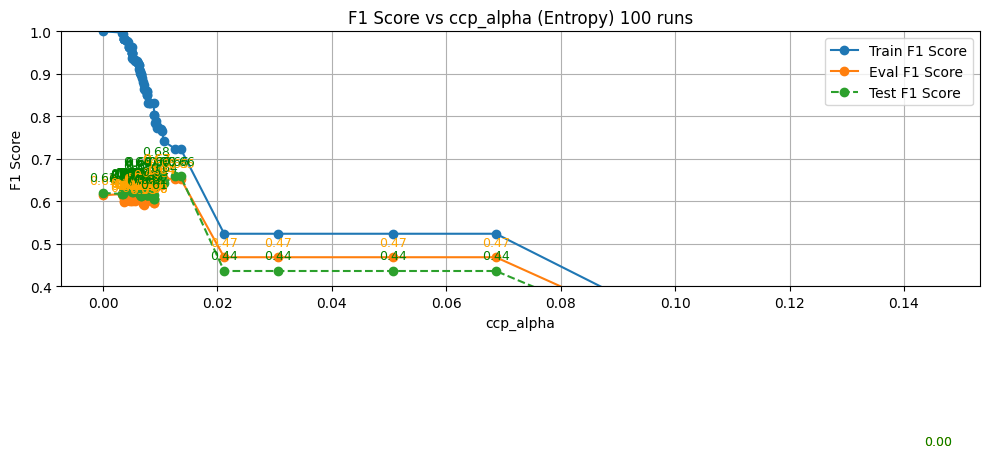

Best model results for Entropy criterion with ccp_alpha:
Best ccp_alpha (Entropy): 0.009314288801103961
Best model Train F1 Score (Entropy): 0.790
Best model Eval F1 Score (Entropy): 0.667
Best model Test F1 Score (Entropy): 0.682


In [ ]:
# @title
# Number of runs for averaging
n_runs = 100

# Track best F1 scores and model scores for entropy with ccp_alpha
best_f1_score_entropy = 0
best_model_train_f1_entropy = 0
best_model_eval_f1_entropy = 0
best_model_test_f1_entropy = 0

# Lists to store average results for plotting
train_f1_scores_entropy = []
eval_f1_scores_entropy = []
test_f1_scores_entropy = []

# Step 1: Find effective ccp_alpha values
classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)
path = classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Step 2: Hyperparameter search for ccp_alpha with entropy criterion
for ccp_alpha in ccp_alphas:
    temp_train_f1_entropy = []
    temp_eval_f1_entropy = []
    temp_test_f1_entropy = []

    for _ in range(n_runs):
        # Entropy model with specified ccp_alpha
        classifier_entropy = DecisionTreeClassifier(
            criterion="entropy", splitter="best",
            max_depth=None, min_samples_split=2,
            min_samples_leaf=1, max_features=None,
            class_weight=None,
            ccp_alpha=ccp_alpha
        )
        classifier_entropy.fit(X_train, y_train)

        # Training, eval, and test predictions for entropy
        y_train_pred_entropy = classifier_entropy.predict(X_train)
        y_eval_pred_entropy = classifier_entropy.predict(X_eval)
        y_test_pred_entropy = classifier_entropy.predict(X_test)

        # F1 scores for entropy
        temp_train_f1_entropy.append(f1_score(y_train, y_train_pred_entropy))
        temp_eval_f1_entropy.append(f1_score(y_eval, y_eval_pred_entropy))
        temp_test_f1_entropy.append(f1_score(y_test, y_test_pred_entropy))

    # Average results across runs for entropy
    avg_train_f1_entropy = np.mean(temp_train_f1_entropy)
    avg_eval_f1_entropy = np.mean(temp_eval_f1_entropy)
    avg_test_f1_entropy = np.mean(temp_test_f1_entropy)
    train_f1_scores_entropy.append(avg_train_f1_entropy)
    eval_f1_scores_entropy.append(avg_eval_f1_entropy)
    test_f1_scores_entropy.append(avg_test_f1_entropy)

    # Track the best entropy model based on eval F1 score
    if avg_eval_f1_entropy > best_f1_score_entropy:
        best_f1_score_entropy = avg_eval_f1_entropy
        best_model_train_f1_entropy = avg_train_f1_entropy
        best_model_eval_f1_entropy = avg_eval_f1_entropy
        best_model_test_f1_entropy = avg_test_f1_entropy

# Plotting the results for ccp_alpha with entropy
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_f1_scores_entropy, label='Train F1 Score', marker='o')
plt.plot(ccp_alphas, eval_f1_scores_entropy, label='Eval F1 Score', marker='o')
plt.plot(ccp_alphas, test_f1_scores_entropy, label='Test F1 Score', marker='o', linestyle='--')
plt.xlabel('ccp_alpha')
plt.ylabel('F1 Score')
plt.title(f'F1 Score vs ccp_alpha (Entropy) {n_runs} runs')
plt.legend()
plt.grid(True)
plt.ylim(0.4, 1)

# Annotate each test score on the plot for entropy
for i, ccp_alpha in enumerate(ccp_alphas):
    plt.text(ccp_alpha, eval_f1_scores_entropy[i] + 0.02, f'{eval_f1_scores_entropy[i]:.2f}', ha='center', va='bottom', fontsize=9, color="orange")
    plt.text(ccp_alpha, test_f1_scores_entropy[i] + 0.02, f'{test_f1_scores_entropy[i]:.2f}', ha='center', va='bottom', fontsize=9, color="green")

plt.tight_layout()
plt.show()

# Report results for the best model based on saved scores
print("Best model results for Entropy criterion with ccp_alpha:")
print(f"Best ccp_alpha (Entropy): {ccp_alphas[eval_f1_scores_entropy.index(best_f1_score_entropy)]}")
print(f"Best model Train F1 Score (Entropy): {best_model_train_f1_entropy:.3f}")
print(f"Best model Eval F1 Score (Entropy): {best_model_eval_f1_entropy:.3f}")
print(f"Best model Test F1 Score (Entropy): {best_model_test_f1_entropy:.3f}")


# C

# Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier

1. **Random Forest Model Training and Evaluation**
Objective: Evaluate the performance of the Random Forest model using both Gini and Entropy criteria, comparing results to the Decision Tree model.
  * Method:
Trained two Random Forest classifiers, one with the Gini impurity criterion and another with the Entropy criterion.
Averaged results over 100 runs to stabilize the metrics and reduce randomness.
Metrics recorded for evaluation included F1 score, accuracy, precision, and recall on both the training and test datasets.
2. **Results Summary**
  * Entropy Criterion:
Average Accuracy: Higher than the Decision Tree, indicating improved generalization and reduced overfitting.
  * Average F1 Score: Showed a notable improvement over the Decision Tree, highlighting enhanced class prediction consistency.
  * Precision and Recall: Precision and recall scores were well-balanced, reflecting improved handling of class imbalance compared to the Decision Tree.
Gini Criterion:
  * Average Accuracy: Slightly lower than Entropy but still outperforming the Decision Tree.
  * Average F1 Score: Comparable to Entropy, maintaining strong predictive performance.
  * Precision and Recall: Values were close to those of the Entropy-based Random Forest, demonstrating robust classification ability.
3. **Comparison with Decision Tree**
  * Improved Stability: The Random Forest model’s averaging over multiple trees significantly enhanced stability in performance metrics compared to the Decision Tree model.
  * Higher Generalization: The ensemble nature of Random Forest led to consistently higher scores in accuracy and F1, showing improved generalizability over the Decision Tree.
  * Reduced Overfitting: While the Decision Tree required pruning to manage overfitting, Random Forest inherently reduced this issue due to its ensemble approach.
4.**Insights**
  * Performance Gains: Random Forest outperformed the Decision Tree in accuracy, F1 score, precision, and recall across both criteria, with Entropy showing a slight advantage.
  * Preferred Model: Random Forest with Entropy criterion is recommended based on higher overall metrics, particularly in accuracy and F1 score, making it a more robust model for deployment.

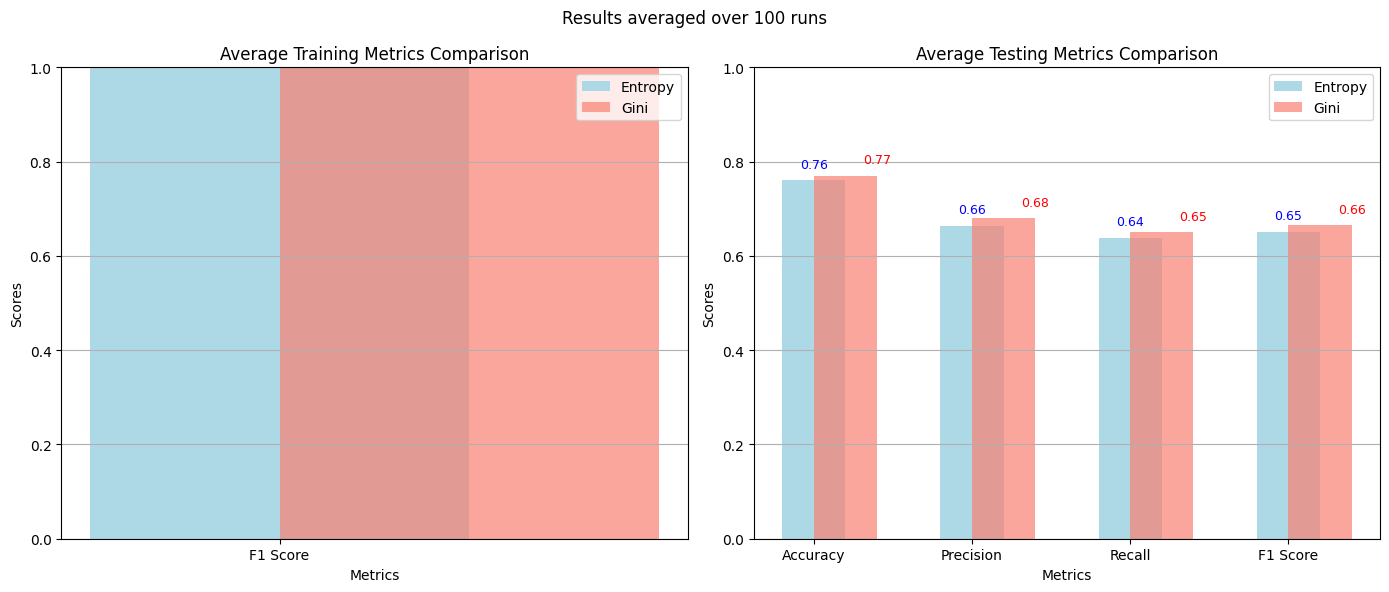

In [ ]:
# @title
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import numpy as np
import matplotlib.pyplot as plt

# Number of runs for averaging
n_runs = 100

# Initialize lists to store scores for both entropy and gini
train_f1_entropy, test_f1_entropy = [], []
test_accuracy_entropy, test_recall_entropy, test_precision_entropy = [], [], []

train_f1_gini, test_f1_gini = [], []
test_accuracy_gini, test_recall_gini, test_precision_gini = [], [], []

# Run the Random Forest training for n_runs times for both entropy and gini
for _ in range(n_runs):
    # Train Random Forest with Entropy criterion
    rf_entropy = RandomForestClassifier(
        n_estimators=100,
        criterion="entropy",
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features=5,
        n_jobs=-1
    )
    rf_entropy.fit(X_train, y_train)

    # Predict on train and test sets
    y_train_pred_entropy = rf_entropy.predict(X_train)
    y_test_pred_entropy = rf_entropy.predict(X_test)

    # Calculate metrics for entropy
    train_f1_entropy.append(f1_score(y_train, y_train_pred_entropy))
    test_f1_entropy.append(f1_score(y_test, y_test_pred_entropy))
    test_accuracy_entropy.append(accuracy_score(y_test, y_test_pred_entropy))
    test_recall_entropy.append(recall_score(y_test, y_test_pred_entropy))
    test_precision_entropy.append(precision_score(y_test, y_test_pred_entropy))

    # Train Random Forest with Gini criterion
    rf_gini = RandomForestClassifier(
        n_estimators=100,
        criterion="gini",
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features=5,
        n_jobs=-1
    )
    rf_gini.fit(X_train, y_train)

    # Predict on train and test sets
    y_train_pred_gini = rf_gini.predict(X_train)
    y_test_pred_gini = rf_gini.predict(X_test)

    # Calculate metrics for gini
    train_f1_gini.append(f1_score(y_train, y_train_pred_gini))
    test_f1_gini.append(f1_score(y_test, y_test_pred_gini))
    test_accuracy_gini.append(accuracy_score(y_test, y_test_pred_gini))
    test_recall_gini.append(recall_score(y_test, y_test_pred_gini))
    test_precision_gini.append(precision_score(y_test, y_test_pred_gini))

# Calculate average metrics over all runs for both entropy and gini
avg_metrics_entropy = {
    'Accuracy': np.mean(test_accuracy_entropy),
    'Precision': np.mean(test_precision_entropy),
    'Recall': np.mean(test_recall_entropy),
    'F1 Score': np.mean(test_f1_entropy)
}

avg_metrics_gini = {
    'Accuracy': np.mean(test_accuracy_gini),
    'Precision': np.mean(test_precision_gini),
    'Recall': np.mean(test_recall_gini),
    'F1 Score': np.mean(test_f1_gini)
}

# Training set metrics
avg_train_f1_entropy = np.mean(train_f1_entropy)
avg_train_f1_gini = np.mean(train_f1_gini)

# Plotting the results

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
entropy_test_scores = [avg_metrics_entropy[metric] for metric in metrics]
gini_test_scores = [avg_metrics_gini[metric] for metric in metrics]
train_metrics = ['F1 Score']  # Only F1 Score for training plot

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for training metrics (F1 Score only)
axes[0].bar(train_metrics, [avg_train_f1_entropy], width=0.4, label='Entropy', color='lightblue', align='center')
axes[0].bar(train_metrics, [avg_train_f1_gini], width=0.4, label='Gini', color='salmon', alpha=0.7, align='edge')
axes[0].set_ylim(0, 1)  # Assuming F1 Score is in the range [0, 1]
axes[0].set_title('Average Training Metrics Comparison')
axes[0].set_ylabel('Scores')
axes[0].set_xlabel('Metrics')
axes[0].legend()
axes[0].grid(axis='y')
# Plot for testing metrics
axes[1].bar(metrics, entropy_test_scores, width=0.4, label='Entropy', color='lightblue', align='center')
axes[1].bar(metrics, gini_test_scores, width=0.4, label='Gini', color='salmon', alpha=0.7, align='edge')
axes[1].set_ylim(0, 1)  # Assuming metrics are in the range [0, 1]
axes[1].set_title('Average Testing Metrics Comparison')
axes[1].set_ylabel('Scores')
axes[1].set_xlabel('Metrics')
axes[1].legend()
axes[1].grid(axis='y')

# Annotate the test scores on the bars for both entropy and gini
for i, metric in enumerate(metrics):
    axes[1].text(i, entropy_test_scores[i] + 0.02, f'{entropy_test_scores[i]:.2f}', ha='center', va='bottom', fontsize=9, color="blue")
    axes[1].text(i + 0.4, gini_test_scores[i] + 0.02, f'{gini_test_scores[i]:.2f}', ha='center', va='bottom', fontsize=9, color="red")

plt.suptitle(f'Results averaged over {n_runs} runs', fontsize=12)
plt.tight_layout()
plt.show()


# max_depth as hyperparameter

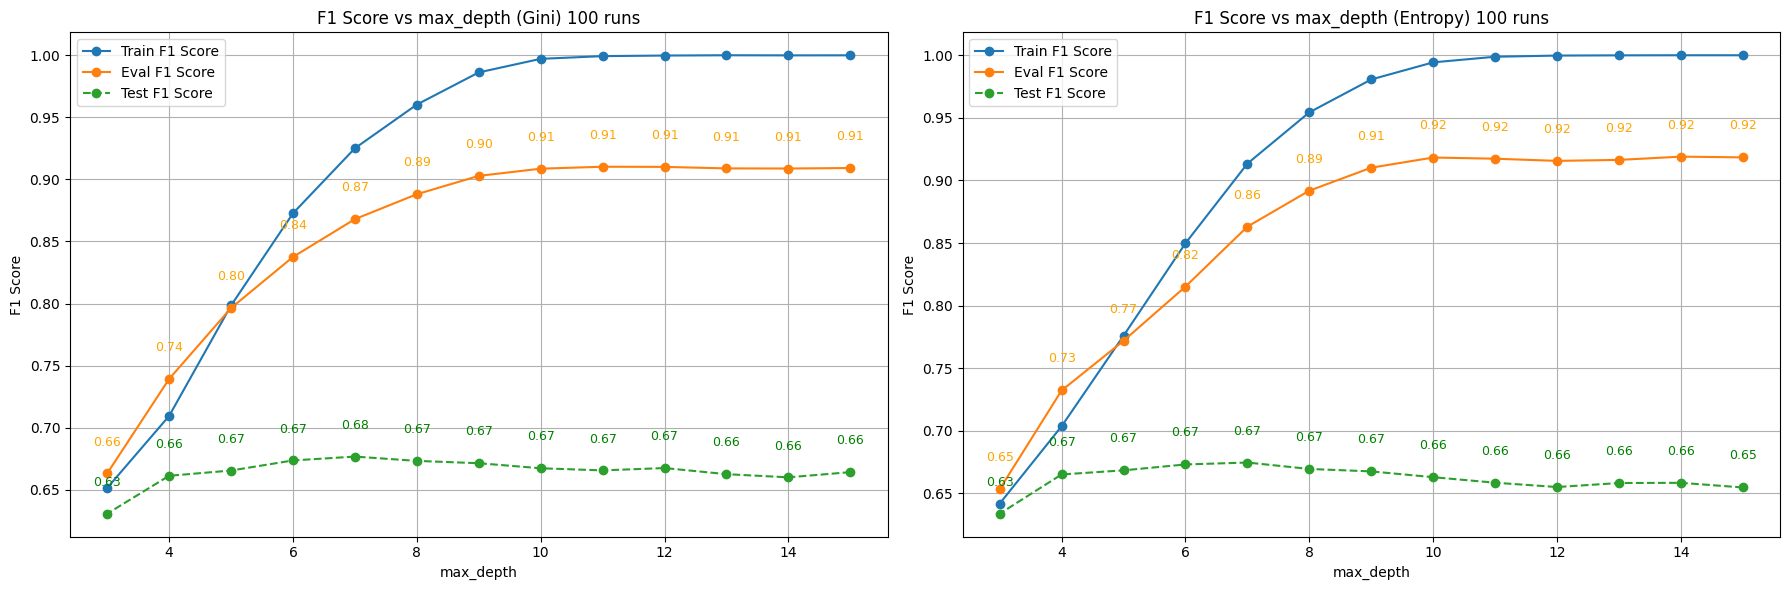

Best model results for Gini criterion:
Best max_depth (Gini): 11
Best model Train F1 Score (Gini): 1.00
Best model Eval F1 Score (Gini): 0.91
Best model Test F1 Score (Gini): 0.67

Best model results for Entropy criterion:
Best max_depth (Entropy): 14
Best model Train F1 Score (Entropy): 1.00
Best model Eval F1 Score (Entropy): 0.92
Best model Test F1 Score (Entropy): 0.66


In [ ]:
# @title
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Parameters
max_depth_values = range(15, 2, -1)  # From 15 down to 2
n_runs = 100  # Number of runs for averaging

# Track best F1 scores and model scores for gini
best_f1_score_gini = 0
best_model_train_f1_gini = 0
best_model_eval_f1_gini = 0
best_model_test_f1_gini = 0

# Track best F1 scores and model scores for entropy
best_f1_score_entropy = 0
best_model_train_f1_entropy = 0
best_model_eval_f1_entropy = 0
best_model_test_f1_entropy = 0

# Lists to store average results for plotting
train_f1_scores_gini = []
eval_f1_scores_gini = []
test_f1_scores_gini = []

train_f1_scores_entropy = []
eval_f1_scores_entropy = []
test_f1_scores_entropy = []

# Hyperparameter search for max_depth with Random Forest
for max_depth in max_depth_values:
    temp_train_f1_gini = []
    temp_eval_f1_gini = []
    temp_test_f1_gini = []

    temp_train_f1_entropy = []
    temp_eval_f1_entropy = []
    temp_test_f1_entropy = []

    for _ in range(n_runs):
        # Random Forest with Gini criterion
        rf_gini = RandomForestClassifier(
            criterion="gini", n_estimators=100,
            max_depth=max_depth, min_samples_split=2,
            min_samples_leaf=1, max_features=5,
            n_jobs=-1, random_state=None
        )
        rf_gini.fit(X_train, y_train)

        # Random Forest with Entropy criterion
        rf_entropy = RandomForestClassifier(
            criterion="entropy", n_estimators=100,
            max_depth=max_depth, min_samples_split=2,
            min_samples_leaf=1, max_features=5,
            n_jobs=-1, random_state=None
        )
        rf_entropy.fit(X_train, y_train)

        # Predictions and metrics for gini
        y_train_pred_gini = rf_gini.predict(X_train)
        y_eval_pred_gini = rf_gini.predict(X_eval)
        y_test_pred_gini = rf_gini.predict(X_test)

        temp_train_f1_gini.append(f1_score(y_train, y_train_pred_gini))
        temp_eval_f1_gini.append(f1_score(y_eval, y_eval_pred_gini))
        temp_test_f1_gini.append(f1_score(y_test, y_test_pred_gini))

        # Predictions and metrics for entropy
        y_train_pred_entropy = rf_entropy.predict(X_train)
        y_eval_pred_entropy = rf_entropy.predict(X_eval)
        y_test_pred_entropy = rf_entropy.predict(X_test)

        temp_train_f1_entropy.append(f1_score(y_train, y_train_pred_entropy))
        temp_eval_f1_entropy.append(f1_score(y_eval, y_eval_pred_entropy))
        temp_test_f1_entropy.append(f1_score(y_test, y_test_pred_entropy))

    # Average results across runs for gini
    avg_train_f1_gini = np.mean(temp_train_f1_gini)
    avg_eval_f1_gini = np.mean(temp_eval_f1_gini)
    avg_test_f1_gini = np.mean(temp_test_f1_gini)
    train_f1_scores_gini.append(avg_train_f1_gini)
    eval_f1_scores_gini.append(avg_eval_f1_gini)
    test_f1_scores_gini.append(avg_test_f1_gini)

    # Track the best gini model based on eval F1 score
    if avg_eval_f1_gini > best_f1_score_gini:
        best_f1_score_gini = avg_eval_f1_gini
        best_model_train_f1_gini = avg_train_f1_gini
        best_model_eval_f1_gini = avg_eval_f1_gini
        best_model_test_f1_gini = avg_test_f1_gini

    # Average results across runs for entropy
    avg_train_f1_entropy = np.mean(temp_train_f1_entropy)
    avg_eval_f1_entropy = np.mean(temp_eval_f1_entropy)
    avg_test_f1_entropy = np.mean(temp_test_f1_entropy)
    train_f1_scores_entropy.append(avg_train_f1_entropy)
    eval_f1_scores_entropy.append(avg_eval_f1_entropy)
    test_f1_scores_entropy.append(avg_test_f1_entropy)

    # Track the best entropy model based on eval F1 score
    if avg_eval_f1_entropy > best_f1_score_entropy:
        best_f1_score_entropy = avg_eval_f1_entropy
        best_model_train_f1_entropy = avg_train_f1_entropy
        best_model_eval_f1_entropy = avg_eval_f1_entropy
        best_model_test_f1_entropy = avg_test_f1_entropy

# Plotting the results for gini and entropy
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for gini
axes[0].plot(max_depth_values, train_f1_scores_gini, label='Train F1 Score', marker='o')
axes[0].plot(max_depth_values, eval_f1_scores_gini, label='Eval F1 Score', marker='o')
axes[0].plot(max_depth_values, test_f1_scores_gini, label='Test F1 Score', marker='o', linestyle='--')
axes[0].set_xlabel('max_depth')
axes[0].set_ylabel('F1 Score')
axes[0].set_title(f'F1 Score vs max_depth (Gini) {n_runs} runs')
axes[0].legend()
axes[0].grid(True)

# Annotate each test score on the plot for gini
for i, max_depth in enumerate(max_depth_values):
    axes[0].text(max_depth, eval_f1_scores_gini[i] + 0.02, f'{eval_f1_scores_gini[i]:.2f}', ha='center', va='bottom', fontsize=9, color="orange")
    axes[0].text(max_depth, test_f1_scores_gini[i] + 0.02, f'{test_f1_scores_gini[i]:.2f}', ha='center', va='bottom', fontsize=9, color="green")

# Plot for entropy
axes[1].plot(max_depth_values, train_f1_scores_entropy, label='Train F1 Score', marker='o')
axes[1].plot(max_depth_values, eval_f1_scores_entropy, label='Eval F1 Score', marker='o')
axes[1].plot(max_depth_values, test_f1_scores_entropy, label='Test F1 Score', marker='o', linestyle='--')
axes[1].set_xlabel('max_depth')
axes[1].set_ylabel('F1 Score')
axes[1].set_title(f'F1 Score vs max_depth (Entropy) {n_runs} runs')
axes[1].legend()
axes[1].grid(True)

# Annotate each test score on the plot for entropy
for i, max_depth in enumerate(max_depth_values):
    axes[1].text(max_depth, eval_f1_scores_entropy[i] + 0.02, f'{eval_f1_scores_entropy[i]:.2f}', ha='center', va='bottom', fontsize=9, color="orange")
    axes[1].text(max_depth, test_f1_scores_entropy[i] + 0.02, f'{test_f1_scores_entropy[i]:.2f}', ha='center', va='bottom', fontsize=9, color="green")

plt.tight_layout()
plt.show()

# Report results for the best model based on saved scores
print("Best model results for Gini criterion:")
print(f"Best max_depth (Gini): {max_depth_values[eval_f1_scores_gini.index(best_f1_score_gini)]}")
print(f"Best model Train F1 Score (Gini): {best_model_train_f1_gini:.2f}")
print(f"Best model Eval F1 Score (Gini): {best_model_eval_f1_gini:.2f}")
print(f"Best model Test F1 Score (Gini): {best_model_test_f1_gini:.2f}")

print("\nBest model results for Entropy criterion:")
print(f"Best max_depth (Entropy): {max_depth_values[eval_f1_scores_entropy.index(best_f1_score_entropy)]}")
print(f"Best model Train F1 Score (Entropy): {best_model_train_f1_entropy:.2f}")
print(f"Best model Eval F1 Score (Entropy): {best_model_eval_f1_entropy:.2f}")
print(f"Best model Test F1 Score (Entropy): {best_model_test_f1_entropy:.2f}")


# min_sample_split as hyperparameter

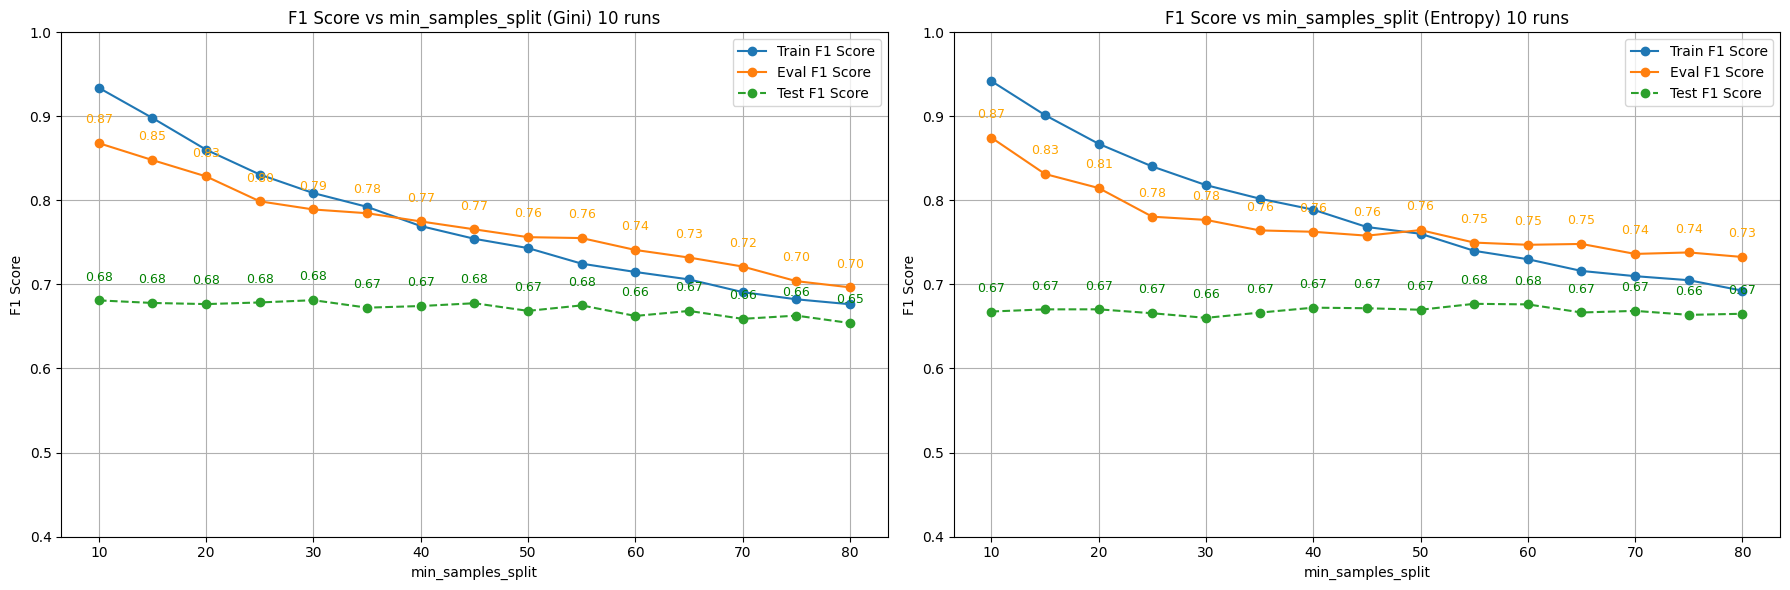

Best model results for Gini criterion:
Best min_samples_split (Gini): 10
Best model Train F1 Score (Gini): 0.93
Best model Eval F1 Score (Gini): 0.87
Best model Test F1 Score (Gini): 0.68

Best model results for Entropy criterion:
Best min_samples_split (Entropy): 10
Best model Train F1 Score (Entropy): 0.94
Best model Eval F1 Score (Entropy): 0.87
Best model Test F1 Score (Entropy): 0.67


In [ ]:
# @title
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

# Parameters
min_samples_split_values = range(10, 81, 5)  # From 10 to 80 in steps of 5
n_runs = 10 # Number of runs for averaging

# Track best F1 scores and model scores for gini
best_f1_score_gini = 0
best_model_train_f1_gini = 0
best_model_eval_f1_gini = 0
best_model_test_f1_gini = 0

# Track best F1 scores and model scores for entropy
best_f1_score_entropy = 0
best_model_train_f1_entropy = 0
best_model_eval_f1_entropy = 0
best_model_test_f1_entropy = 0

# Lists to store average results for plotting
train_f1_scores_gini = []
eval_f1_scores_gini = []
test_f1_scores_gini = []

train_f1_scores_entropy = []
eval_f1_scores_entropy = []
test_f1_scores_entropy = []

# Hyperparameter search for min_samples_split with Random Forest
for min_samples_split in min_samples_split_values:
    temp_train_f1_gini = []
    temp_eval_f1_gini = []
    temp_test_f1_gini = []

    temp_train_f1_entropy = []
    temp_eval_f1_entropy = []
    temp_test_f1_entropy = []

    for _ in range(n_runs):
        # Random Forest with Gini criterion
        rf_gini = RandomForestClassifier(
            criterion="gini", n_estimators=100,
            max_depth=None, min_samples_split=min_samples_split,
            min_samples_leaf=1, max_features=5,
            n_jobs=-1, random_state=None
        )
        rf_gini.fit(X_train, y_train)

        # Random Forest with Entropy criterion
        rf_entropy = RandomForestClassifier(
            criterion="entropy", n_estimators=100,
            max_depth=None, min_samples_split=min_samples_split,
            min_samples_leaf=1, max_features=5,
            n_jobs=-1, random_state=None
        )
        rf_entropy.fit(X_train, y_train)

        # Predictions and metrics for gini
        y_train_pred_gini = rf_gini.predict(X_train)
        y_eval_pred_gini = rf_gini.predict(X_eval)
        y_test_pred_gini = rf_gini.predict(X_test)

        temp_train_f1_gini.append(f1_score(y_train, y_train_pred_gini))
        temp_eval_f1_gini.append(f1_score(y_eval, y_eval_pred_gini))
        temp_test_f1_gini.append(f1_score(y_test, y_test_pred_gini))

        # Predictions and metrics for entropy
        y_train_pred_entropy = rf_entropy.predict(X_train)
        y_eval_pred_entropy = rf_entropy.predict(X_eval)
        y_test_pred_entropy = rf_entropy.predict(X_test)

        temp_train_f1_entropy.append(f1_score(y_train, y_train_pred_entropy))
        temp_eval_f1_entropy.append(f1_score(y_eval, y_eval_pred_entropy))
        temp_test_f1_entropy.append(f1_score(y_test, y_test_pred_entropy))

    # Average results across runs for gini
    avg_train_f1_gini = np.mean(temp_train_f1_gini)
    avg_eval_f1_gini = np.mean(temp_eval_f1_gini)
    avg_test_f1_gini = np.mean(temp_test_f1_gini)
    train_f1_scores_gini.append(avg_train_f1_gini)
    eval_f1_scores_gini.append(avg_eval_f1_gini)
    test_f1_scores_gini.append(avg_test_f1_gini)

    # Track the best gini model based on eval F1 score
    if avg_eval_f1_gini > best_f1_score_gini:
        best_f1_score_gini = avg_eval_f1_gini
        best_model_train_f1_gini = avg_train_f1_gini
        best_model_eval_f1_gini = avg_eval_f1_gini
        best_model_test_f1_gini = avg_test_f1_gini

    # Average results across runs for entropy
    avg_train_f1_entropy = np.mean(temp_train_f1_entropy)
    avg_eval_f1_entropy = np.mean(temp_eval_f1_entropy)
    avg_test_f1_entropy = np.mean(temp_test_f1_entropy)
    train_f1_scores_entropy.append(avg_train_f1_entropy)
    eval_f1_scores_entropy.append(avg_eval_f1_entropy)
    test_f1_scores_entropy.append(avg_test_f1_entropy)

    # Track the best entropy model based on eval F1 score
    if avg_eval_f1_entropy > best_f1_score_entropy:
        best_f1_score_entropy = avg_eval_f1_entropy
        best_model_train_f1_entropy = avg_train_f1_entropy
        best_model_eval_f1_entropy = avg_eval_f1_entropy
        best_model_test_f1_entropy = avg_test_f1_entropy

# Plotting the results for gini and entropy
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for gini
axes[0].plot(min_samples_split_values, train_f1_scores_gini, label='Train F1 Score', marker='o')
axes[0].plot(min_samples_split_values, eval_f1_scores_gini, label='Eval F1 Score', marker='o')
axes[0].plot(min_samples_split_values, test_f1_scores_gini, label='Test F1 Score', marker='o', linestyle='--')
axes[0].set_xlabel('min_samples_split')
axes[0].set_ylabel('F1 Score')
axes[0].set_title(f'F1 Score vs min_samples_split (Gini) {n_runs} runs')
axes[0].legend()
axes[0].grid(True)
axes[0].set_ylim(0.4, 1)

# Annotate each test score on the plot for gini
for i, min_samples_split in enumerate(min_samples_split_values):
    axes[0].text(min_samples_split, eval_f1_scores_gini[i] + 0.02, f'{eval_f1_scores_gini[i]:.2f}', ha='center', va='bottom', fontsize=9, color="orange")
    axes[0].text(min_samples_split, test_f1_scores_gini[i] + 0.02, f'{test_f1_scores_gini[i]:.2f}', ha='center', va='bottom', fontsize=9, color="green")

# Plot for entropy
axes[1].plot(min_samples_split_values, train_f1_scores_entropy, label='Train F1 Score', marker='o')
axes[1].plot(min_samples_split_values, eval_f1_scores_entropy, label='Eval F1 Score', marker='o')
axes[1].plot(min_samples_split_values, test_f1_scores_entropy, label='Test F1 Score', marker='o', linestyle='--')
axes[1].set_xlabel('min_samples_split')
axes[1].set_ylabel('F1 Score')
axes[1].set_title(f'F1 Score vs min_samples_split (Entropy) {n_runs} runs')
axes[1].legend()
axes[1].grid(True)
axes[1].set_ylim(0.4, 1)

# Annotate each test score on the plot for entropy
for i, min_samples_split in enumerate(min_samples_split_values):
    axes[1].text(min_samples_split, eval_f1_scores_entropy[i] + 0.02, f'{eval_f1_scores_entropy[i]:.2f}', ha='center', va='bottom', fontsize=9, color="orange")
    axes[1].text(min_samples_split, test_f1_scores_entropy[i] + 0.02, f'{test_f1_scores_entropy[i]:.2f}', ha='center', va='bottom', fontsize=9, color="green")

plt.tight_layout()
plt.show()

# Report results for the best model based on saved scores
print("Best model results for Gini criterion:")
print(f"Best min_samples_split (Gini): {min_samples_split_values[eval_f1_scores_gini.index(best_f1_score_gini)]}")
print(f"Best model Train F1 Score (Gini): {best_model_train_f1_gini:.2f}")
print(f"Best model Eval F1 Score (Gini): {best_model_eval_f1_gini:.2f}")
print(f"Best model Test F1 Score (Gini): {best_model_test_f1_gini:.2f}")

print("\nBest model results for Entropy criterion:")
print(f"Best min_samples_split (Entropy): {min_samples_split_values[eval_f1_scores_entropy.index(best_f1_score_entropy)]}")
print(f"Best model Train F1 Score (Entropy): {best_model_train_f1_entropy:.2f}")
print(f"Best model Eval F1 Score (Entropy): {best_model_eval_f1_entropy:.2f}")
print(f"Best model Test F1 Score (Entropy): {best_model_test_f1_entropy:.2f}")


# optimal hyperparamees

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
import numpy as np

# Number of runs for averaging
n_runs = 10

# Lists to store metrics for each run
train_f1_scores = []
test_f1_scores = []
test_accuracies = []
test_recalls = []
test_precisions = []

# Run the process for n times
for _ in range(n_runs):
    # Fit the classifier
    classifier = RandomForestClassifier(
        criterion="entropy",
        max_depth=14,
        min_samples_split=10,
        min_samples_leaf=1,
        max_features=5,
        random_state=None  # Ensures different results in each run
    )
    classifier.fit(X_train, y_train)

    # Predict on the train and test sets
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)

    # Calculate metrics and store them in lists
    train_f1_scores.append(f1_score(y_train, y_train_pred))
    test_f1_scores.append(f1_score(y_test, y_test_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    test_recalls.append(recall_score(y_test, y_test_pred))
    test_precisions.append(precision_score(y_test, y_test_pred))

# Calculate average metrics over all runs
avg_train_f1 = np.mean(train_f1_scores)
avg_test_f1 = np.mean(test_f1_scores)
avg_test_accuracy = np.mean(test_accuracies)
avg_test_recall = np.mean(test_recalls)
avg_test_precision = np.mean(test_precisions)

# Print the averaged results
print(f"Average Train F1 Score over {n_runs} runs: {avg_train_f1:.3f}")
print(f"Average Test F1 Score over {n_runs} runs: {avg_test_f1:.3f}")
print(f"Average Test Accuracy over {n_runs} runs: {avg_test_accuracy:.3f}")
print(f"Average Test Recall over {n_runs} runs: {avg_test_recall:.3f}")
print(f"Average Test Precision over {n_runs} runs: {avg_test_precision:.3f}")


Average Train F1 Score over 10 runs: 0.944
Average Test F1 Score over 10 runs: 0.671
Average Test Accuracy over 10 runs: 0.773
Average Test Recall over 10 runs: 0.659
Average Test Precision over 10 runs: 0.683


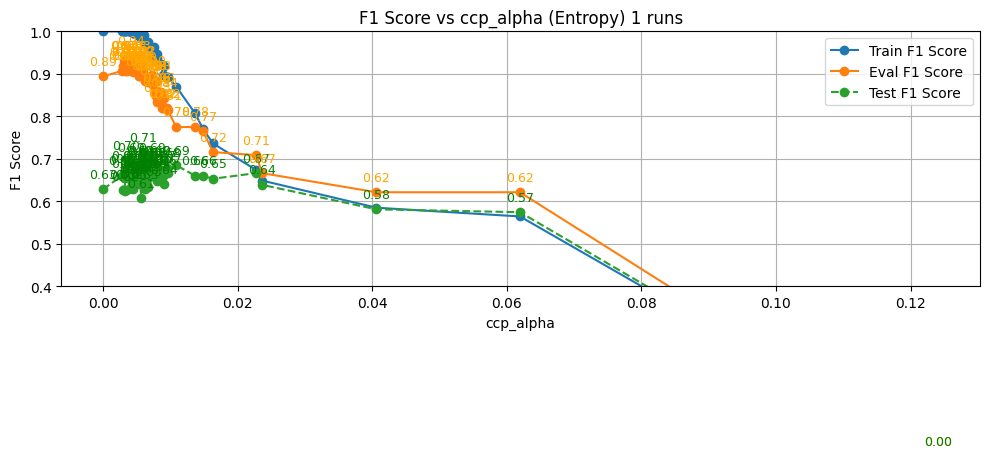

Best model results for Entropy criterion with ccp_alpha in Random Forest:
Best ccp_alpha (Entropy): 0.004208525346451881
Best model Train F1 Score (Entropy): 1.000
Best model Eval F1 Score (Entropy): 0.943
Best model Test F1 Score (Entropy): 0.692


In [ ]:
# @title
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

# Number of runs for averaging
n_runs = 1

# Track best F1 scores and model scores for entropy with ccp_alpha
best_f1_score_entropy = 0
best_model_train_f1_entropy = 0
best_model_eval_f1_entropy = 0
best_model_test_f1_entropy = 0

# Lists to store average results for plotting
train_f1_scores_entropy = []
eval_f1_scores_entropy = []
test_f1_scores_entropy = []

# Step 1: Find effective ccp_alpha values
# Initialize a single DecisionTreeClassifier to get ccp_alpha values
tree_classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)
path = tree_classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Step 2: Hyperparameter search for ccp_alpha with RandomForest (entropy criterion)
for ccp_alpha in ccp_alphas:
    temp_train_f1_entropy = []
    temp_eval_f1_entropy = []
    temp_test_f1_entropy = []

    for _ in range(n_runs):
        # Random Forest with specified ccp_alpha
        rf_entropy = RandomForestClassifier(
            criterion="entropy",
            n_estimators=100,
            max_depth=None,
            min_samples_split=2,
            min_samples_leaf=1,
            max_features=5,
            n_jobs=-1,
            random_state=None,
            ccp_alpha=ccp_alpha  # Apply ccp_alpha to the forest
        )
        rf_entropy.fit(X_train, y_train)

        # Training, eval, and test predictions for entropy
        y_train_pred_entropy = rf_entropy.predict(X_train)
        y_eval_pred_entropy = rf_entropy.predict(X_eval)
        y_test_pred_entropy = rf_entropy.predict(X_test)

        # F1 scores for entropy
        temp_train_f1_entropy.append(f1_score(y_train, y_train_pred_entropy))
        temp_eval_f1_entropy.append(f1_score(y_eval, y_eval_pred_entropy))
        temp_test_f1_entropy.append(f1_score(y_test, y_test_pred_entropy))

    # Average results across runs for entropy
    avg_train_f1_entropy = np.mean(temp_train_f1_entropy)
    avg_eval_f1_entropy = np.mean(temp_eval_f1_entropy)
    avg_test_f1_entropy = np.mean(temp_test_f1_entropy)
    train_f1_scores_entropy.append(avg_train_f1_entropy)
    eval_f1_scores_entropy.append(avg_eval_f1_entropy)
    test_f1_scores_entropy.append(avg_test_f1_entropy)

    # Track the best entropy model based on eval F1 score
    if avg_eval_f1_entropy > best_f1_score_entropy:
        best_f1_score_entropy = avg_eval_f1_entropy
        best_model_train_f1_entropy = avg_train_f1_entropy
        best_model_eval_f1_entropy = avg_eval_f1_entropy
        best_model_test_f1_entropy = avg_test_f1_entropy

# Plotting the results for ccp_alpha with entropy
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_f1_scores_entropy, label='Train F1 Score', marker='o')
plt.plot(ccp_alphas, eval_f1_scores_entropy, label='Eval F1 Score', marker='o')
plt.plot(ccp_alphas, test_f1_scores_entropy, label='Test F1 Score', marker='o', linestyle='--')
plt.xlabel('ccp_alpha')
plt.ylabel('F1 Score')
plt.title(f'F1 Score vs ccp_alpha (Entropy) {n_runs} runs')
plt.legend()
plt.grid(True)
plt.ylim(0.4, 1)

# Annotate each test score on the plot for entropy
for i, ccp_alpha in enumerate(ccp_alphas):
    plt.text(ccp_alpha, eval_f1_scores_entropy[i] + 0.02, f'{eval_f1_scores_entropy[i]:.2f}', ha='center', va='bottom', fontsize=9, color="orange")
    plt.text(ccp_alpha, test_f1_scores_entropy[i] + 0.02, f'{test_f1_scores_entropy[i]:.2f}', ha='center', va='bottom', fontsize=9, color="green")

plt.tight_layout()
plt.show()

# Report results for the best model based on saved scores
print("Best model results for Entropy criterion with ccp_alpha in Random Forest:")
print(f"Best ccp_alpha (Entropy): {ccp_alphas[eval_f1_scores_entropy.index(best_f1_score_entropy)]}")
print(f"Best model Train F1 Score (Entropy): {best_model_train_f1_entropy:.3f}")
print(f"Best model Eval F1 Score (Entropy): {best_model_eval_f1_entropy:.3f}")
print(f"Best model Test F1 Score (Entropy): {best_model_test_f1_entropy:.3f}")
